In [1]:
from IPython.display import Image
Image(url= "images/process_ML.png", width=10000)

## Project Plan: 
#### 1) Business Needs
#### 2) Data Integration
#### 3) Data exploration and analysis
- Identify problems
- Missing Values
- Outliers
- Data Visualization
#### 4) Data preparation: 
- Fill/remove missing values
- Deal with outliers
- Check coherance
- Feature engineering: creating new variables
- Data transformation: one-hot-encoding, normalization... 
- Feature selection: (filter mothods/ wrapper method/ embedded method)
#### 5) Modeling
- Apply different models
- Model Selction (Estimating performances of different models to choose the best one) 
#### 6) Model assessment
(Having chosen a model, estimating the prediction error on new data) 
Check for performance as well as overfitting
#### 7) Deployment

## Business Needs: 
In the beginning of 2020, five Portuguese entrepreneurs built a startup to sell goods related to digital detox. Using an online store, TechScape sells products and services which will allow their customers to stay focused on the most important things and improve the balance with technology use in their lives, such as meditation kits, books, stress balls, "dumb" phones, retreats, among others.

With the emergence of Covid-19 in March 2020, the company had some financial difficulties, and they were out of function in April 2020. But in May 2020, they restarted their activities, knowing that a digital detox is becoming even more critical in this period of time, where people need to unplug themselves and improve their quality of life.

Focused in increasing their sales, TechScape hired a team of data scientists to analyze the online behavior of their customers and to predict which customers have a high probability of buying their products depending on their online actions.

Your goal is to build a predictive model that answers the question “Which customers are more likely to buy our products?” using the small quantity of data accessible from the customers data base that contains general information about the customers and their behaviour in the website from February 2020 till December 2020 (excluding April)

## Data Integration

### Importing libraries: 

In [89]:
import pandas as pd
import numpy as np
import pydot
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
from pprint import pprint
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import time
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [90]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
train=pd.read_csv('C:/Users/Yuri/Documents/Mestrado/Machine learning/techscape-ecommerce/train.csv')
train

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,798279589,8-May-20,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0
9995,798314158,17-Jul-20,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0
9996,798339820,23-Mar-20,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0
9997,798371242,16-May-20,0,0.0,0,0.0,53,715.5000,0.0226,0.0363,0.0000,Windows,2,Italy,3,Returner,0


In [92]:
test=pd.read_csv('C:/Users/Yuri/Documents/Mestrado/Machine learning/techscape-ecommerce/test.csv')
test

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.00,0,0.000,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.50,0,0.000,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.00,0,0.000,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
3,798760918,14-May-20,0,0.00,0,0.000,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
4,798856982,5-Nov-20,12,225.25,1,0.000,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,962042726,27-Nov-20,10,720.50,2,88.725,220,10580.3448,0.0048,0.0221,0.0000,Windows,2,Portugal,1,Returner
2296,962063064,20-Mar-20,0,0.00,0,0.000,3,55.0000,0.0667,0.1000,0.0000,MacOSX,2,Spain,3,Returner
2297,962147749,22-Nov-20,2,45.50,0,0.000,22,535.0000,0.0000,0.0250,9.6503,Windows,2,Spain,11,Returner
2298,962182167,19-Nov-20,8,166.70,0,0.000,9,171.7000,0.0167,0.0500,0.0000,Windows,2,Portugal,3,Returner


##  Data exploration and analysis
- Identify problems
- Missing Values
- Outliers
- Data Visualization

In [150]:
train.shape

(9999, 17)

In [151]:
test.shape

(2300, 16)

In [152]:
train.dtypes

Access_ID                       int64
Date                           object
AccountMng_Pages                int64
AccountMng_Duration           float64
FAQ_Pages                       int64
FAQ_Duration                  float64
Product_Pages                   int64
Product_Duration              float64
GoogleAnalytics_BounceRate    float64
GoogleAnalytics_ExitRate      float64
GoogleAnalytics_PageValue     float64
OS                             object
Browser                         int64
Country                        object
Type_of_Traffic                 int64
Type_of_Visitor                object
Buy                             int64
dtype: object

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

- Access_ID - Unique identification of the user access to the website
- Date - Website visit date
- AccountMng_Pages - Number of pages visited by the user about account management
- AccountMng_Duration - Total amount of time (seconds) spent by the user on account management related pages
- FAQ_Pages - Number of pages visited by the user about frequently asked questions, shipping information and company related pages
- FAQ_Duration - Total amount of time (seconds) spent by the user on FAQ pages
- Product_Pages - Number of pages visited by the user about products and services offered by the company
- Product_Duration - Total amount in time (seconds) spent by the user on products and services related pages
- GoogleAnalytics_BounceRate - Average bounce rate value of the pages visited by the user, provided by google analytics. Meaning a website’s bounce rate measures how many visitors leave a page without performing a specific action, such as buying something, filling out a form, or clicking on a link. A high bounce rate means that a visitor’s overall session duration is short; they visit a page on your site and leave. A low bounce rate means that visitors are spending time on a page and clicking on available links.
- GoogleAnalytics_ExitRate - Average exit rate value of the pages visited by the user, provided by google analytics

The difference between a bounce rate and an exit rate is sometimes not well understood since the two are somewhat similar. If the bounce rate is the number of single-engagement sessions a webpage has, the exit rate is the number of people departing a specific page, even if they didn’t originally land on it.

So, if a person lands on page 1 of your site and hits their browser’s back button to the referring page, that’s a bounce. But if they land on page 1, go to page 2, and then quit their browser or jump to another site, that’s considered an exit. Because they clicked to another page from page 1, that can’t be considered a bounce. Neither can page 2 since that’s not the first page the person landed on.

In terms of analysis, a bounce may indicate a lack of interest in a site, but a high exit rate could indicate you’re having problems with conversion rate optimization
- GoogleAnalytics_PageValue - Average page value of the pages visited by the user, provided by google analytics: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).
- OS - Operating System of the user
- Browser - Browser used to access the webpage
- Country - The country of the user
- Type_of_Traffic - Traffic Source by which the user has accessed the website (e.g., email, banner, direct)
- Type_of_Visitor - User type as "New access", "Returner" or "Other"
- Buy - Class label indicating if the user finalized their actions in the website with a transaction

In [154]:
train.Type_of_Traffic.nunique()

15

There are 15 traffic types

In [155]:
train.Type_of_Visitor.unique()

array(['Returner', 'New_Access', 'Other'], dtype=object)

In [156]:
train.Browser.unique()

array([ 2,  4,  7,  1,  3, 13,  5,  8,  6, 10, 11, 12], dtype=int64)

In [157]:
train.Browser.nunique()

12

There are 12 browser types used
- nb: 9 is missing

In [158]:
train['OS'].nunique()

8

##### Defining metric and non_metric features: 

In [93]:
non_metric_features = ["OS", "Browser", "Country", "Type_of_Traffic", "Type_of_Visitor"]
metric_features=['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration','Product_Pages','Product_Duration','GoogleAnalytics_BounceRate','GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']

In [18]:
train['Date']

0       21-Mar-20
1       20-May-20
2        4-Dec-20
3       22-Dec-20
4       24-Nov-20
          ...    
9994     8-May-20
9995    17-Jul-20
9996    23-Mar-20
9997    16-May-20
9998    20-Nov-20
Name: Date, Length: 9999, dtype: object

In [94]:
# Convert the column Date into Datetime64 datatype
train['Date'] = pd.to_datetime(train['Date'], format = '%d-%b-%y')

test['Date'] = pd.to_datetime(test['Date'], format = '%d-%b-%y')

In [162]:
train['Date']

0      2020-03-21
1      2020-05-20
2      2020-12-04
3      2020-12-22
4      2020-11-24
          ...    
9994   2020-05-08
9995   2020-07-17
9996   2020-03-23
9997   2020-05-16
9998   2020-11-20
Name: Date, Length: 9999, dtype: datetime64[ns]

### Checking the balance of the dataset

In [163]:
train.Buy.unique()

array([0, 1], dtype=int64)

We're dealing with a binary classification problem

In [164]:
train['Buy'].value_counts(normalize=True)*100

0    84.478448
1    15.521552
Name: Buy, dtype: float64

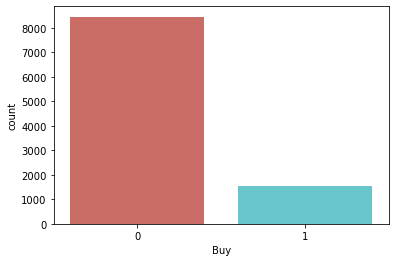

In [165]:
sns.countplot(x='Buy', data=train, palette='hls')
plt.show()

We're dealing with an unbalanced dataset

### Checking for missing values

In [95]:
# Replace the strange characters by NaN
strange_values_list = ["!","$","%","?","*","+","_","@","€"," ","{", ""]
train.replace(strange_values_list,np.nan, inplace=True)
# count of missing values
train.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [22]:
# replace "" by nans
test.replace(strange_values_list, np.nan, inplace=True)

# count of missing values
test.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
dtype: int64

We have no missing values in this dataset

### Checking for any duplicates

In [168]:
duplicate=train.duplicated()
print(duplicate.sum())
train[duplicate]

0


,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy


We have no suplicates in this dataset

In [169]:
pd.options.display.max_columns = None
train[metric_features].describe()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120
std,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000
75%,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700


### Checking variables' correlation

In [170]:
train[metric_features].corr().round(2)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue
AccountMng_Pages,1.00,0.61,0.38,0.26,0.43,0.37,-0.22,-0.32,0.10
AccountMng_Duration,0.61,1.00,0.31,0.24,0.30,0.37,-0.15,-0.21,0.06
FAQ_Pages,0.38,0.31,1.00,0.62,0.39,0.39,-0.12,-0.16,0.05
FAQ_Duration,0.26,0.24,0.62,1.00,0.29,0.36,-0.08,-0.11,0.03
Product_Pages,0.43,0.30,0.39,0.29,1.00,0.86,-0.21,-0.29,0.05
Product_Duration,0.37,0.37,0.39,0.36,0.86,1.00,-0.18,-0.25,0.05
GoogleAnalytics_BounceRate,-0.22,-0.15,-0.12,-0.08,-0.21,-0.18,1.00,0.91,-0.12
GoogleAnalytics_ExitRate,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1.00,-0.17
GoogleAnalytics_PageValue,0.10,0.06,0.05,0.03,0.05,0.05,-0.12,-0.17,1.00


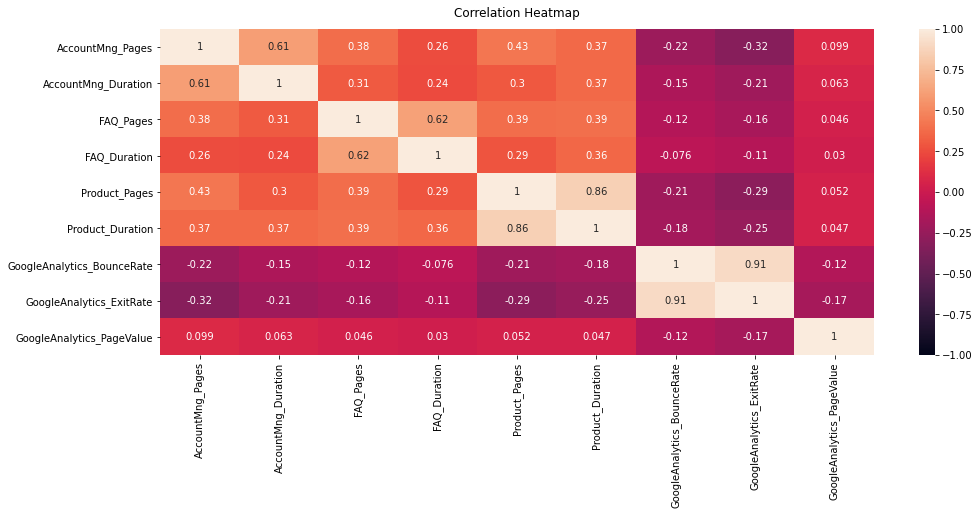

In [171]:
import matplotlib.pyplot as plt
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train[metric_features].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Variables distribution

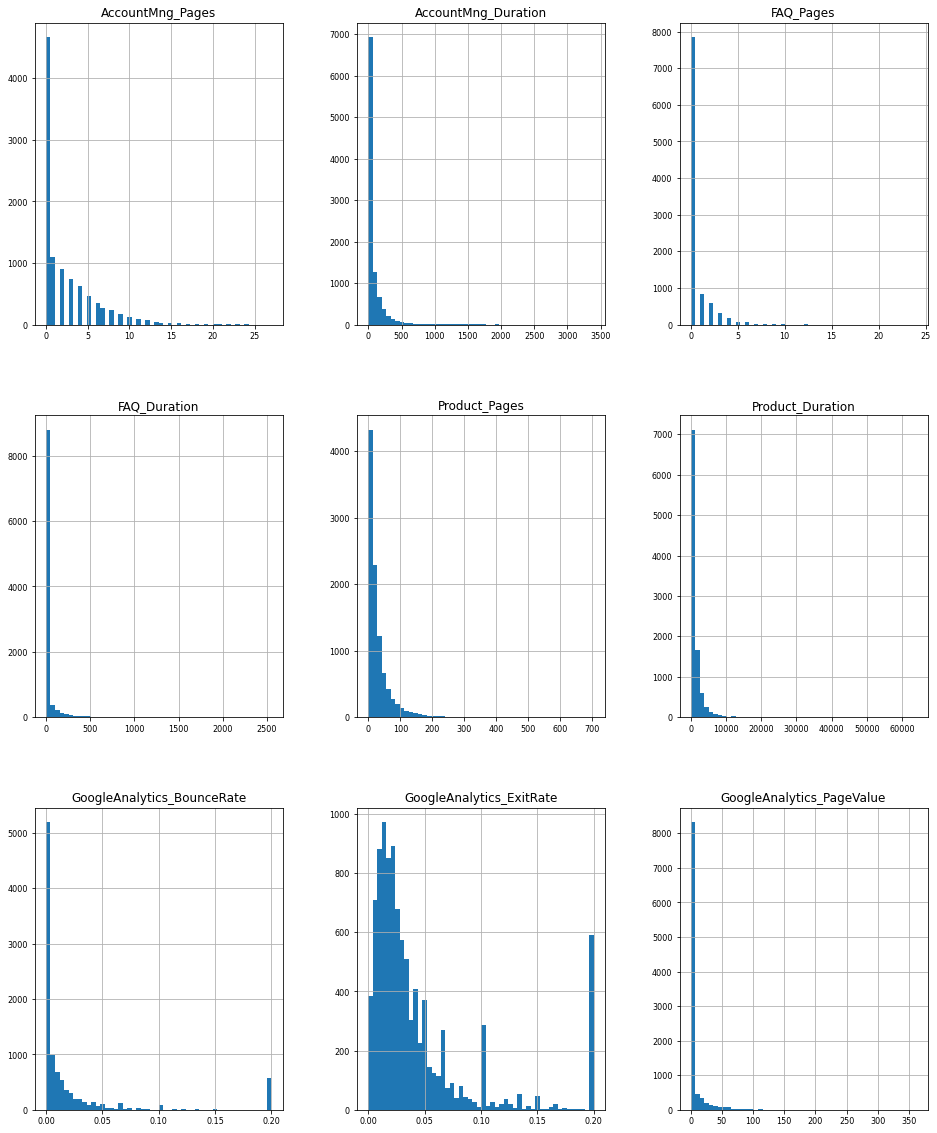

In [172]:
train[metric_features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Categorical Variables'  Frequencies

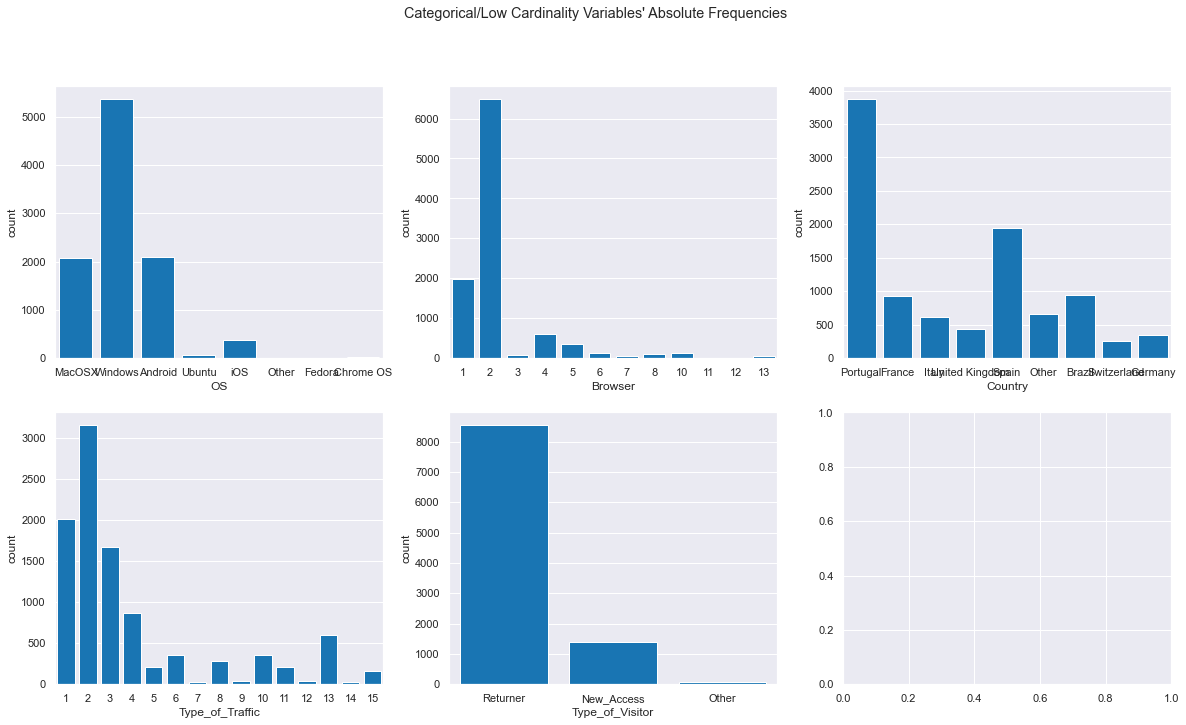

In [30]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(train[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
plt.show()

Text(0, 0.5, 'Proportion of buyers')

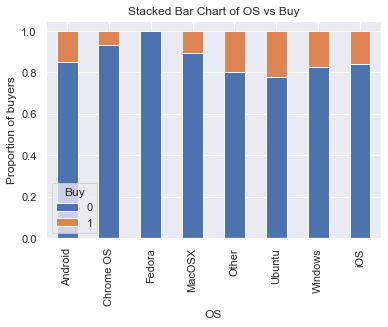

In [31]:
table=pd.crosstab(train.OS,train.Buy)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of OS vs Buy')
plt.xlabel('OS')
plt.ylabel('Proportion of buyers')


Text(0, 0.5, 'Proportion of buyers')

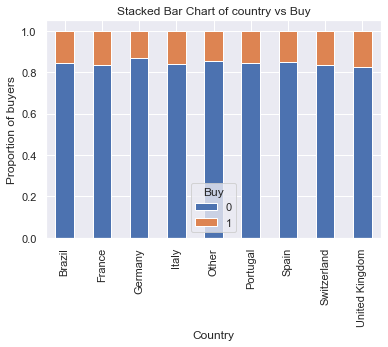

In [32]:
table=pd.crosstab(train.Country,train.Buy)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of country vs Buy')
plt.xlabel('Country')
plt.ylabel('Proportion of buyers')

Text(0, 0.5, 'Proportion of buyers')

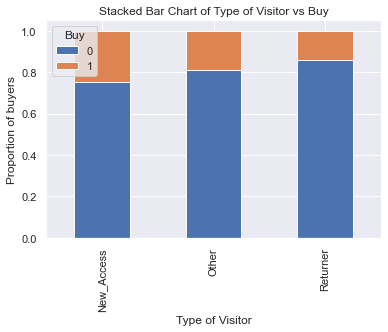

In [33]:
table=pd.crosstab(train.Type_of_Visitor,train.Buy)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Type of Visitor vs Buy')
plt.xlabel('Type of Visitor')
plt.ylabel('Proportion of buyers')

Text(0, 0.5, 'Proportion of buyers')

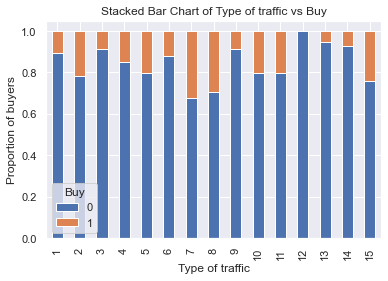

In [34]:
table=pd.crosstab(train.Type_of_Traffic,train.Buy)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Type of traffic vs Buy')
plt.xlabel('Type of traffic')
plt.ylabel('Proportion of buyers')

Text(0, 0.5, 'Proportion of buyers')

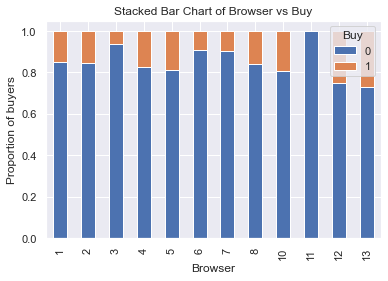

In [35]:
table=pd.crosstab(train.Browser,train.Buy)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Browser vs Buy')
plt.xlabel('Browser')
plt.ylabel('Proportion of buyers')

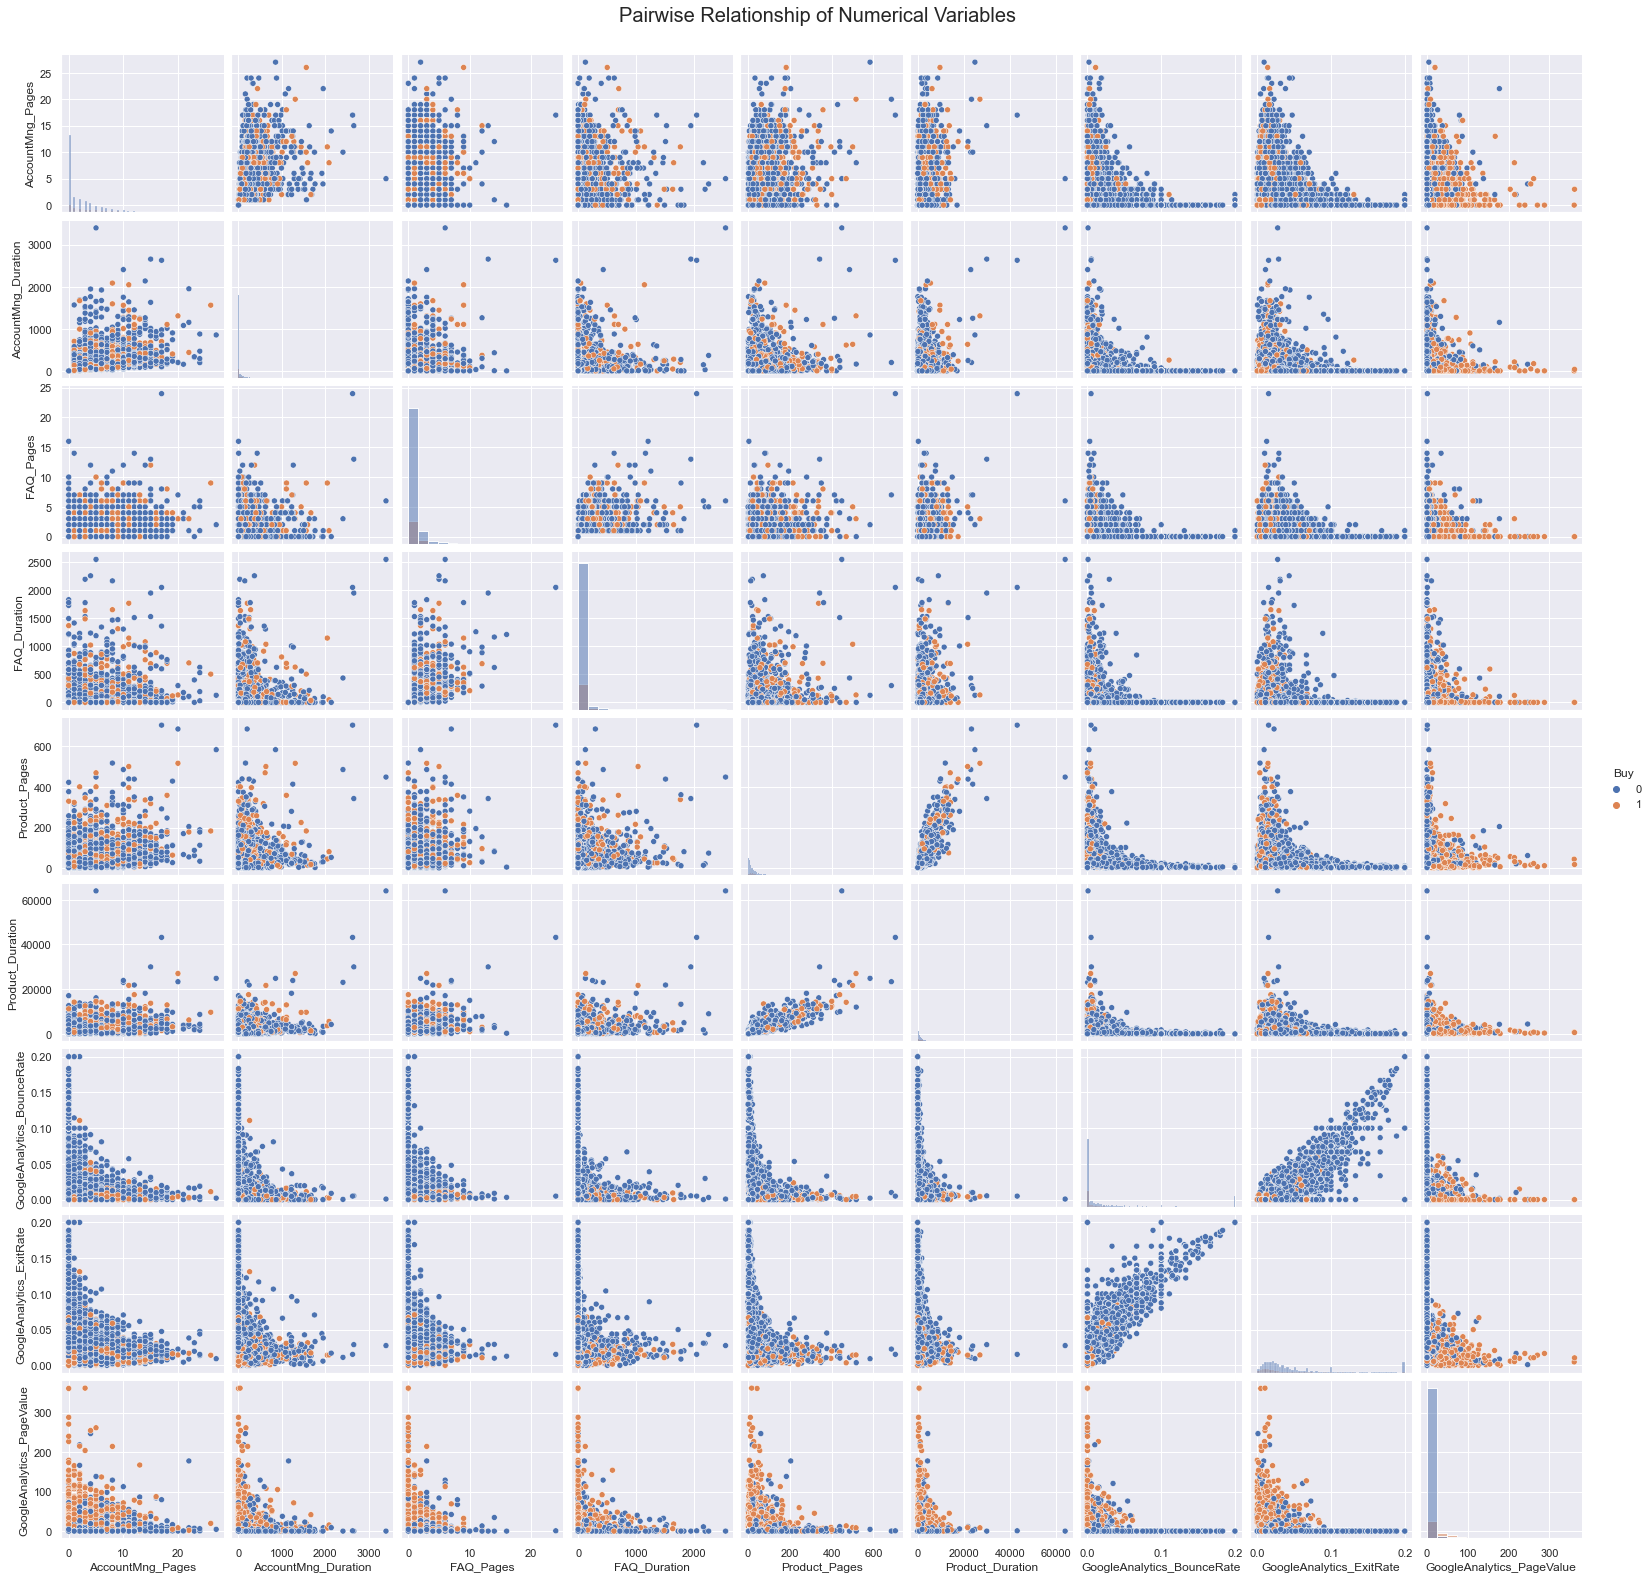

In [36]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(train[metric_features + ['Buy']], diag_kind="hist", hue='Buy')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

### Checking for outliers


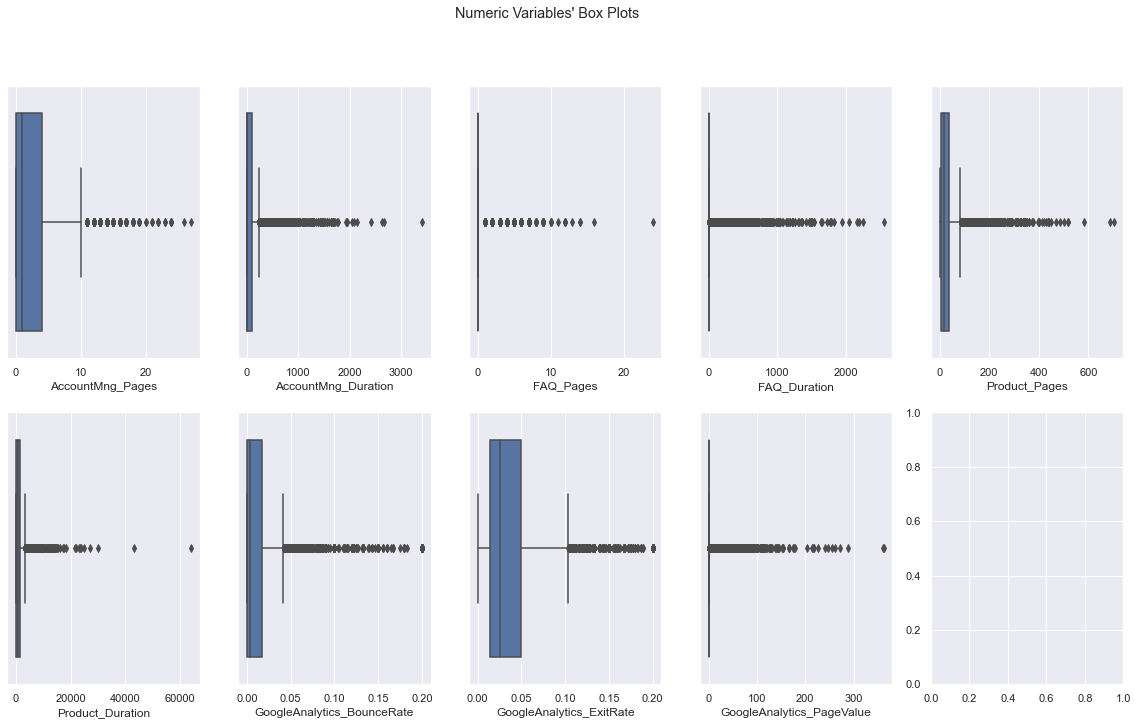

In [37]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

- potential univariate outliers


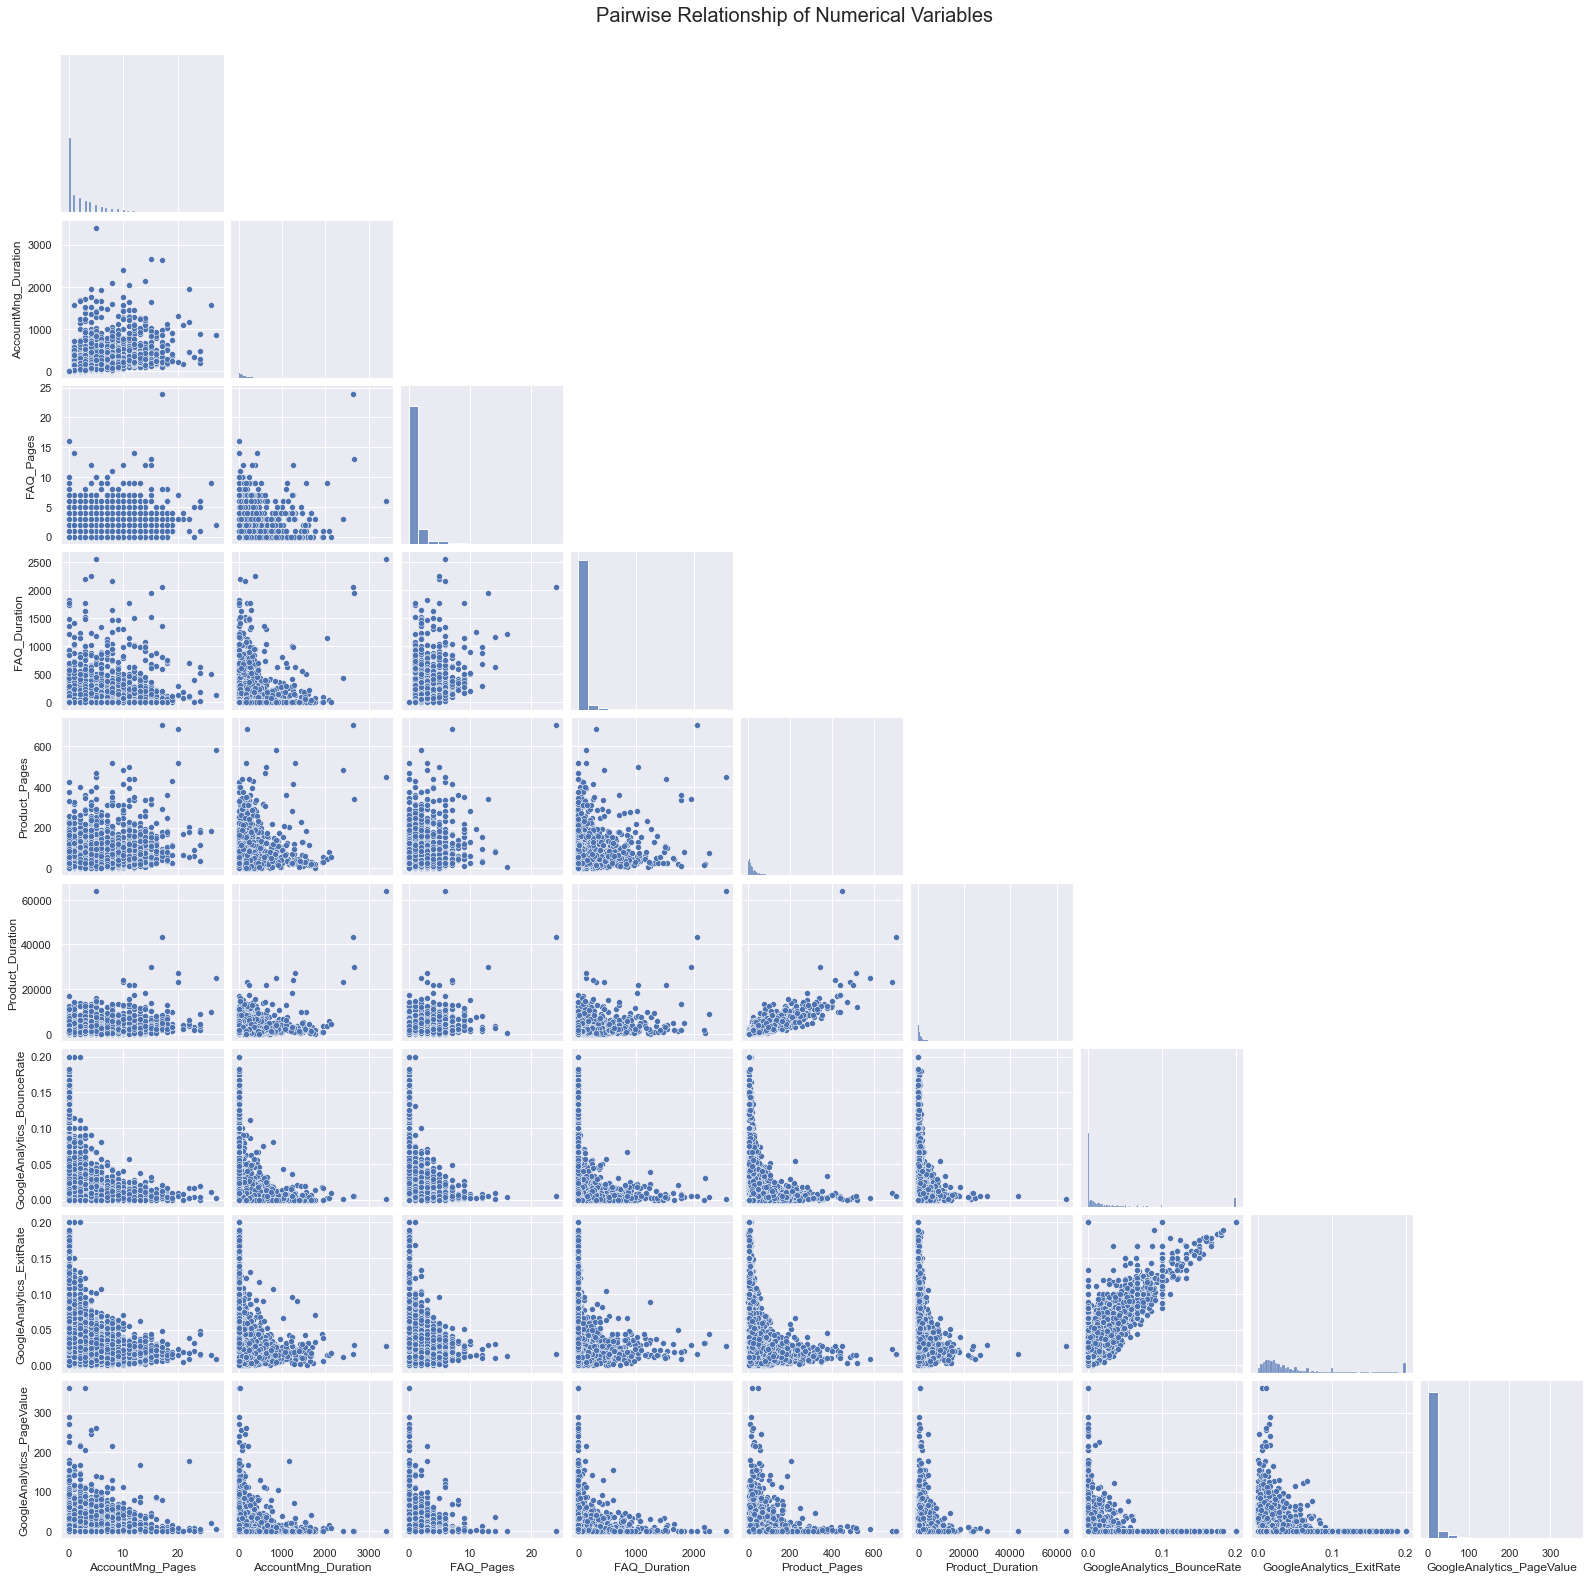

In [269]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(train[metric_features], diag_kind="hist", corner=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

- Potential bi-variate outliers

### Coherance Check: 

In [270]:
train.loc[(train['AccountMng_Pages'] !=0) & (train['AccountMng_Duration'] == 0)]

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
28,104650368,2020-11-05,1,0.0,0,0.0,14,1125.8750,0.0000,0.0429,0.0000,Windows,2,Portugal,2,Returner,0
64,107375098,2020-08-07,1,0.0,3,69.0,15,352.8750,0.0000,0.0556,0.0000,Windows,2,Spain,2,Returner,0
161,113677580,2020-11-28,1,0.0,0,0.0,39,1159.5417,0.0013,0.0313,0.0000,Windows,2,Other,2,Returner,1
185,115628954,2020-05-23,2,0.0,0,0.0,0,0.0000,0.2000,0.2000,0.0000,Android,2,Portugal,6,Returner,0
195,116343256,2020-10-11,1,0.0,1,66.4,14,668.3167,0.0143,0.0286,44.8935,iOS,2,Portugal,15,Returner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9628,776479996,2020-06-26,1,0.0,0,0.0,12,277.4500,0.0600,0.0900,0.0000,MacOSX,2,Spain,13,Returner,0
9630,776570163,2020-05-25,1,0.0,0,0.0,27,889.0000,0.0214,0.0679,0.0000,iOS,1,Spain,3,Returner,0
9669,778884123,2020-05-26,1,0.0,0,0.0,90,5621.5992,0.0000,0.0131,2.0990,Windows,2,Italy,2,Returner,0
9795,786784027,2020-05-17,1,0.0,1,313.0,6,135.5000,0.0286,0.0857,0.0000,Windows,2,Italy,2,Returner,0


It is not possible to have the time spent on accounting management pages =0 when the number of accounting management pages checked is not null.

In [271]:
train.loc[(train['AccountMng_Pages'] ==0) & (train['AccountMng_Duration'] != 0)]

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy


In [272]:
train.loc[(train['FAQ_Pages'] !=0) & (train['FAQ_Duration'] == 0)]

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
82,108661612,2020-05-24,5,60.0000,1,0.0,10,647.6667,0.0167,0.0400,0.0000,Windows,4,Portugal,2,Returner,0
94,109518386,2020-03-22,1,26.0000,1,0.0,55,872.4000,0.0035,0.0175,0.0000,Windows,5,Portugal,1,Returner,0
107,110232818,2020-12-29,1,30.2500,2,0.0,20,543.9583,0.0095,0.0270,0.0000,MacOSX,2,Portugal,2,Returner,0
120,110897183,2020-05-13,5,73.5000,1,0.0,79,5664.1460,0.0454,0.0591,2.3949,Windows,2,Other,1,Returner,0
179,115513750,2020-12-17,0,0.0000,1,0.0,131,4597.5753,0.0068,0.0288,0.0000,MacOSX,2,Portugal,2,Returner,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,790484629,2020-11-16,3,123.5000,1,0.0,22,759.5833,0.0000,0.0096,46.6785,Android,1,Spain,2,Returner,1
9905,793068063,2020-11-13,6,104.4000,1,0.0,32,879.7500,0.0000,0.0143,20.5035,Windows,4,Portugal,1,Returner,1
9975,797548245,2020-03-20,0,0.0000,1,0.0,46,4053.0922,0.0142,0.0297,0.0000,Android,1,Portugal,2,Returner,0
9986,797878996,2020-12-20,16,230.3264,1,0.0,86,2351.8347,0.0021,0.0208,0.3352,Windows,2,Brazil,10,Returner,0


It is not possible to have the time spent on FAQ pages =0 when the number of FAQ pages visited is not null.

In [273]:
train.loc[(train['FAQ_Pages'] ==0) & (train['FAQ_Duration'] != 0)]

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy


In [274]:
train.loc[(train['Product_Pages'] !=0) & (train['Product_Duration'] == 0)]

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
16,103674236,2020-12-22,0,0.0,0,0.0,1,0.0,0.2,0.20,0.0,Windows,2,Switzerland,1,Returner,0
19,103778619,2020-09-01,0,0.0,0,0.0,1,0.0,0.2,0.20,0.0,Android,1,France,2,Returner,0
26,104571401,2020-12-21,0,0.0,0,0.0,1,0.0,0.2,0.20,0.0,Windows,2,Brazil,13,Returner,0
37,105317095,2020-05-02,0,0.0,0,0.0,1,0.0,0.2,0.20,0.0,Android,1,Brazil,1,Returner,0
38,105337816,2020-03-24,4,539.5,0,0.0,1,0.0,0.0,0.05,0.0,MacOSX,2,Germany,8,New_Access,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,797357021,2020-02-09,0,0.0,0,0.0,1,0.0,0.2,0.20,0.0,Windows,2,Brazil,1,Returner,0
9980,797646846,2020-05-06,0,0.0,0,0.0,1,0.0,0.2,0.20,0.0,Android,1,Spain,3,Returner,0
9982,797733043,2020-03-19,0,0.0,0,0.0,1,0.0,0.2,0.20,0.0,Windows,2,Italy,1,Returner,0
9984,797780261,2020-11-30,0,0.0,0,0.0,3,0.0,0.2,0.20,0.0,MacOSX,2,Portugal,10,Returner,0


It is not possible to have the time spent on Product pages =0 when the number of Product pages visited is not null.

In [275]:
train.loc[(train['Product_Pages'] ==0) & (train['Product_Duration'] != 0)]

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy


## Data Preparation: 

### Coherance Check:

In [24]:
train.groupby(['Product_Pages'], as_index=False)['Product_Duration'].mean()

,Product_Pages,Product_Duration
0,0,0.000000
1,1,144.878823
2,2,75.814933
3,3,128.773003
4,4,167.883632
...,...,...
286,517,27009.859400
287,518,11976.721400
288,584,24844.156200
289,686,23342.082100


In [96]:
#Creating Lists with the columns where the change will occur
L1=['AccountMng_Pages','FAQ_Pages', 'Product_Pages']
L2=['AccountMng_Duration', 'FAQ_Duration', 'Product_Duration']
for i, j in zip(L1, L2):
    #serie will take the part of the dataset whithout the null values and get the mean for each group
    serie=train.loc[(train[i] !=0) & (train[j] != 0)].groupby([i], as_index=False)[j].mean() 
    for k in range(0, len(serie)):
        #replace the null value with the mean of that group
        train.loc[(train[i] == serie[i][k]) & (train[j] == 0), j] = serie[j][k]
        test.loc[(test[i] == serie[i][k]) & (test[j] == 0), j] = serie[j][k]

In [26]:
train.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,2020-03-21,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,2020-11-24,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [97]:
train.groupby(['Product_Pages'], as_index=False)['Product_Duration'].mean()

,Product_Pages,Product_Duration
0,0,0.000000
1,1,144.878823
2,2,75.814933
3,3,128.773003
4,4,167.883632
...,...,...
286,517,27009.859400
287,518,11976.721400
288,584,24844.156200
289,686,23342.082100


### Dealing with Outliers:

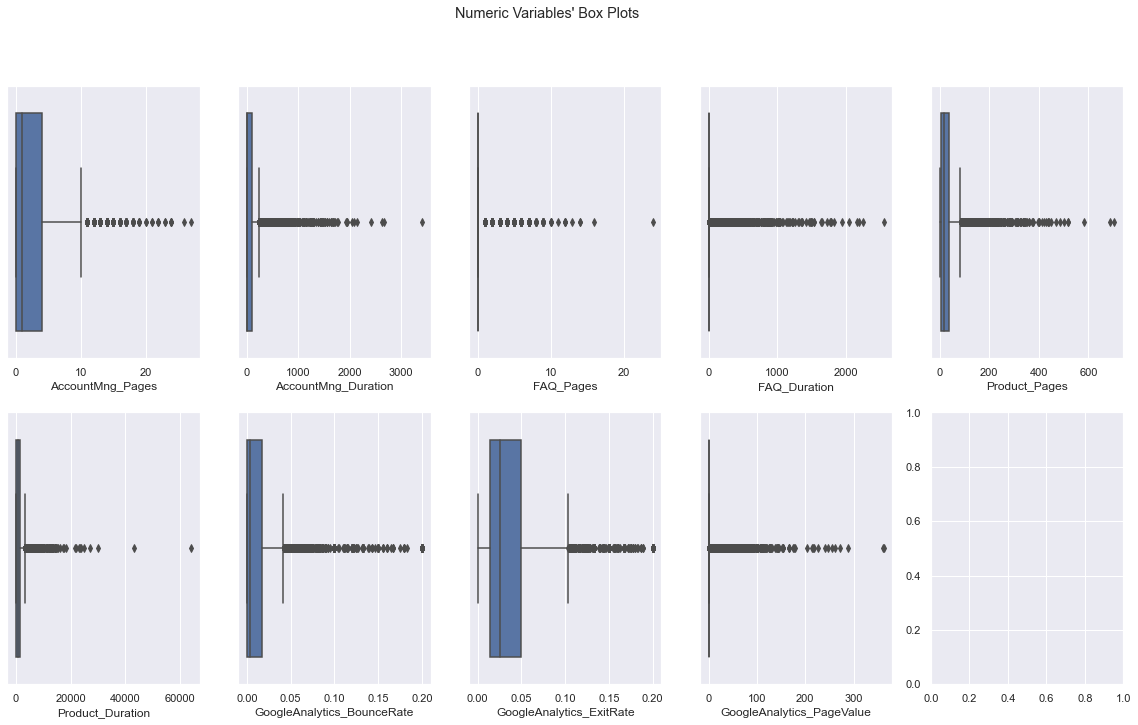

In [98]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [99]:
train[metric_features].groupby(train['Buy']).mean()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue
Buy,,,,,,,,,
0,2.129158,74.382501,0.457322,32.039180,28.745827,1086.765031,0.025475,0.047536,2.051908
1,3.385954,121.778168,0.784149,59.092305,47.687500,1867.399982,0.005053,0.019484,27.250497


In [100]:
filters = (
   
 (train['GoogleAnalytics_PageValue']>=120)

)

df_1 = train[filters]

In [101]:
df_1['Buy'].value_counts(normalize=True)*100

1    82.5
0    17.5
Name: Buy, dtype: float64

In [102]:
train['Buy'].value_counts(normalize=True)*100

0    84.478448
1    15.521552
Name: Buy, dtype: float64

Determining whether a value is an outlier that should be removed or not is very subjective. And while there are certainly valid reasons for throwing away outliers if they are the result of a computer glitch or a human error, eliminating every extreme value is not always a good idea. In our case, for instance, there are some outliers that are unusual values and impossible to occur. The column of 'Project_duration' has some values exceeding 60000sec, suggesting that a person spent more than 17 hours a day going through the project page, which is not likely to happen. 
At the same time, there are some values that can present important information about the data. The extreme values in the column of 'GoogleAnalytics_PageValue', for example, represent a higher percentage of buyers than non-buyers, despite the fact that our dataset is unbalanced.   

**Conclusion:** While some values will be dealt with due to inaccuracy, some extreme values will be kept to further investigate their meaning. 

#### 1st method: filters: 

In [103]:
train_original = train.copy()

In [104]:
#With this method, we will only remove values that do not make sense. 

filters = (
 
    (train['Product_Pages']<=600)
    &
    (train['Product_Duration']<=60000)
    )

df_1 = train[filters]

In [105]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / train_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9997


#### 2nd method: IQR method: 

In [106]:
q25 = train.quantile(.25)
q75 = train.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 10 * iqr
lower_lim = q25 - 10 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(train[metric].between(llim, ulim, inclusive=True))

df_2 = train[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / train_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.5906


In [37]:
print(iqr)

Access_ID                     3.527806e+08
AccountMng_Pages              4.000000e+00
AccountMng_Duration           9.220835e+01
FAQ_Pages                     0.000000e+00
FAQ_Duration                  0.000000e+00
Product_Pages                 3.100000e+01
Product_Duration              1.285393e+03
GoogleAnalytics_BounceRate    1.680000e-02
GoogleAnalytics_ExitRate      3.570000e-02
GoogleAnalytics_PageValue     0.000000e+00
Browser                       0.000000e+00
Type_of_Traffic               2.000000e+00
Buy                           0.000000e+00
dtype: float64


we can't apply the IQR Method, because some features have an IQR of 0. 

#### 3rd method: Z-score: 

note: when we have Skewed distributions we can not use the z-score

In [107]:
df_3=train[(np.abs(stats.zscore(train[metric_features])) < 6).all(axis=1)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / train_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9782


In [39]:
df_3['Buy'].value_counts(normalize=True)*100

0    84.960638
1    15.039362
Name: Buy, dtype: float64

#### 4th method: Quantile based flooring and capping

In [40]:
train.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.739044,0.508051,36.238245,31.685869,1207.931692,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.544851,1.279390,139.952909,44.550277,1953.554823,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,184.877376,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,11.000000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [108]:
perc_train=train.copy()
perc_test=test.copy()
# Computing 99th percentiles and replacing the outliers
ninetieth_percentile = np.percentile(train['Product_Duration'], 99)
print(ninetieth_percentile)
perc_train['Product_Duration']= np.where(perc_train['Product_Duration']>ninetieth_percentile, ninetieth_percentile, perc_train['Product_Duration'])
perc_test['Product_Duration']= np.where(perc_test['Product_Duration']>ninetieth_percentile, ninetieth_percentile, perc_test['Product_Duration'])
# print("Sample:", sample)
print("New array:",perc_train['Product_Duration'])

8622.528074000002
New array: 0         64.0000
1        684.5000
2         95.0000
3        608.7500
4       1609.9397
          ...    
9994    1100.1250
9995      27.6000
9996     644.0000
9997     715.5000
9998    1919.5500
Name: Product_Duration, Length: 9999, dtype: float64


In [109]:
ninetieth_percentile = np.percentile(train['Product_Pages'], 99)
print(ninetieth_percentile)
perc_train['Product_Pages']= np.where(perc_train['Product_Pages']>ninetieth_percentile, ninetieth_percentile, perc_train['Product_Pages'])
perc_test['Product_Pages']= np.where(perc_test['Product_Pages']>ninetieth_percentile, ninetieth_percentile, perc_test['Product_Pages'])
# print("Sample:", sample)
print("New array:",perc_train['Product_Pages'])

219.0
New array: 0        3.0
1       23.0
2        8.0
3        9.0
4       36.0
        ... 
9994    23.0
9995     3.0
9996    27.0
9997    53.0
9998    23.0
Name: Product_Pages, Length: 9999, dtype: float64


#### 5th method: Log transformation: 

In [43]:
df_log=train.copy()
df_log[metric_features] = np.log(train[metric_features])

#### 6th method: Square root transformation: 

In [44]:
df_sqrt=train.copy()
df_sqrt[metric_features] = np.sqrt(train[metric_features])

**Conclusion:** We will use a combination of 2 methods: Quantile based flooring and capping + Square root transformation

**Final method**

In [110]:
# Quantile based flooring and capping
#AccountingMng Duration:
duration_99th_percentile = np.percentile(train['AccountMng_Duration'], 99)
train['AccountMng_Duration']= np.where(train['AccountMng_Duration']>duration_99th_percentile, duration_99th_percentile, train['AccountMng_Duration'])
test['AccountMng_Duration']= np.where(test['AccountMng_Duration']>duration_99th_percentile, duration_99th_percentile, test['AccountMng_Duration'])
#AccountingMng Pages: 
pages_99th_percentile = np.percentile(train['AccountMng_Pages'], 99)
train['AccountMng_Pages']= np.where(train['AccountMng_Pages']>pages_99th_percentile, pages_99th_percentile, train['AccountMng_Pages'])
test['AccountMng_Pages']= np.where(test['AccountMng_Pages']>pages_99th_percentile, pages_99th_percentile, test['AccountMng_Pages'])

In [111]:
#FAQ Duration:
duration_99th_percentile = np.percentile(train['FAQ_Duration'], 99)
train['FAQ_Duration']= np.where(train['FAQ_Duration']>duration_99th_percentile, duration_99th_percentile, train['FAQ_Duration'])
test['FAQ_Duration']= np.where(test['FAQ_Duration']>duration_99th_percentile, duration_99th_percentile, test['FAQ_Duration'])
#FAQ Pages: 
pages_99th_percentile = np.percentile(train['FAQ_Pages'], 99)
train['FAQ_Pages']= np.where(train['FAQ_Pages']>pages_99th_percentile, pages_99th_percentile, train['FAQ_Pages'])
test['FAQ_Pages']= np.where(test['FAQ_Pages']>pages_99th_percentile, pages_99th_percentile, test['FAQ_Pages'])

In [112]:
#Project Duration:
duration_99th_percentile = np.percentile(train['Product_Duration'], 99)
train['Product_Duration']= np.where(train['Product_Duration']>duration_99th_percentile, duration_99th_percentile, train['Product_Duration'])
test['Product_Duration']= np.where(test['Product_Duration']>duration_99th_percentile, duration_99th_percentile, test['Product_Duration'])
#Project Pages: 
pages_99th_percentile = np.percentile(train['Product_Pages'], 99)
train['Product_Pages']= np.where(train['Product_Pages']>pages_99th_percentile, pages_99th_percentile, train['Product_Pages'])
test['Product_Pages']= np.where(test['Product_Pages']>pages_99th_percentile, pages_99th_percentile, test['Product_Pages'])

In [113]:
#GoogleAnalytics_BounceRate:
duration_99th_percentile = np.percentile(train['GoogleAnalytics_BounceRate'], 99)
train['GoogleAnalytics_BounceRate']= np.where(train['GoogleAnalytics_BounceRate']>duration_99th_percentile, duration_99th_percentile, train['GoogleAnalytics_BounceRate'])
test['GoogleAnalytics_BounceRate']= np.where(test['GoogleAnalytics_BounceRate']>duration_99th_percentile, duration_99th_percentile, test['GoogleAnalytics_BounceRate'])
#GoogleAnalytics_ExitRate: 
pages_99th_percentile = np.percentile(train['GoogleAnalytics_ExitRate'], 99)
train['GoogleAnalytics_ExitRate']= np.where(train['GoogleAnalytics_ExitRate']>pages_99th_percentile, pages_99th_percentile, train['GoogleAnalytics_ExitRate'])
test['GoogleAnalytics_ExitRate']= np.where(test['GoogleAnalytics_ExitRate']>pages_99th_percentile, pages_99th_percentile, test['GoogleAnalytics_ExitRate'])
#GoogleAnalytics_PageValue: 
pages_99th_percentile = np.percentile(train['GoogleAnalytics_PageValue'], 99)
train['GoogleAnalytics_PageValue']= np.where(train['GoogleAnalytics_PageValue']>pages_99th_percentile, pages_99th_percentile, train['GoogleAnalytics_PageValue'])
test['GoogleAnalytics_PageValue']= np.where(test['GoogleAnalytics_PageValue']>pages_99th_percentile, pages_99th_percentile, test['GoogleAnalytics_PageValue'])

In [114]:
#Square root transformation: 
train[metric_features] = np.sqrt(train[metric_features])
test[metric_features]=np.sqrt(test[metric_features])

### Feature Engineering: 

### The Date

In [115]:
#Train:
train['Month']=train.Date.dt.month
train['Day']=train.Date.dt.day
train=train.drop(['Date'], axis=1)

#Test:
test['Month']=test.Date.dt.month
test['Day']=test.Date.dt.day
test=test.drop(['Date'], axis=1)
train

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Month,Day
0,102863333,0.000000,0.000000,0.000000,0.000000,1.732051,8.000000,0.000000,0.258263,0.000000,MacOSX,2,Portugal,1,Returner,0,3,21
1,103117814,0.000000,0.000000,0.000000,0.000000,4.795832,26.162951,0.147309,0.211896,0.000000,Windows,2,France,6,Returner,0,5,20
2,103201891,0.000000,0.000000,0.000000,0.000000,2.828427,9.746794,0.158114,0.241454,0.000000,Windows,4,Italy,1,Returner,0,12,4
3,103226087,0.000000,0.000000,0.000000,0.000000,3.000000,24.672860,0.000000,0.158114,6.513256,Windows,2,United Kingdom,2,Returner,1,12,22
4,103234445,0.000000,0.000000,1.414214,19.646883,6.000000,40.124054,0.000000,0.096437,3.536001,Windows,2,Spain,3,Returner,1,11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,798279589,1.732051,12.609520,1.414214,7.449832,4.795832,33.168132,0.000000,0.105357,0.000000,MacOSX,2,Brazil,14,Returner,0,5,8
9995,798314158,2.449490,13.232536,0.000000,0.000000,1.732051,5.253570,0.000000,0.105357,0.000000,Windows,10,Spain,5,New_Access,0,7,17
9996,798339820,0.000000,0.000000,0.000000,0.000000,5.196152,25.377155,0.087750,0.227816,0.000000,MacOSX,2,France,3,Returner,0,3,23
9997,798371242,0.000000,0.000000,0.000000,0.000000,7.280110,26.748832,0.150333,0.190526,0.000000,Windows,2,Italy,3,Returner,0,5,16


In [116]:
metric_features.append('Month')
metric_features.append('Day')

Text(0, 0.5, 'Proportion of buyers')

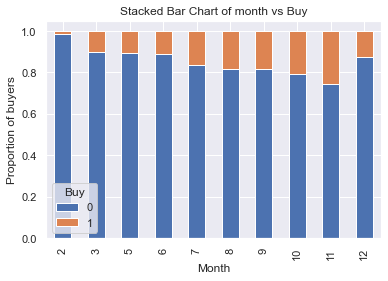

In [117]:
table=pd.crosstab(train.Month,train.Buy)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of month vs Buy')
plt.xlabel('Month')
plt.ylabel('Proportion of buyers')

### Splitting the data: 

In [118]:
# Input Variables and Target Split: 
target = train['Buy']
data_train = train.drop(['Buy'], axis=1) 

In [119]:
X_train, X_val, y_train, y_val = train_test_split(data_train,target, test_size = 0.3, random_state = 0, stratify = target, shuffle = True)

#### 1.1) Chi-Square for categorical data

In [120]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [121]:
X_train_cat=X_train[['OS','Browser','Country', 'Type_of_Traffic', 'Type_of_Visitor']]
for var in X_train_cat:
    TestIndependence(X_train_cat[var],train.Buy, var)

OS is IMPORTANT for Prediction
Browser is NOT an important predictor. (Discard Browser from model)
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction


### 1-hot-encoding:

In [122]:
non_metric_features2=["OS", "Type_of_Traffic", "Type_of_Visitor"]
#Create the encoder
encoder = OneHotEncoder(sparse=False, drop="first")
#Fit the encoder to the train
train_cat=encoder.fit_transform(train[non_metric_features2])
train_cat_names = encoder.get_feature_names()
train_cat = pd.DataFrame(train_cat, index=train.index, columns=train_cat_names)  
#Transform the test
test_cat=encoder.transform(test[non_metric_features2])
test_cat = pd.DataFrame(test_cat, index=test.index, columns=train_cat_names)  

In [123]:
test_cat

,x0_Chrome OS,x0_Fedora,x0_MacOSX,x0_Other,x0_Ubuntu,x0_Windows,x0_iOS,x1_2,x1_3,x1_4,...,x1_8,x1_9,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x2_Other,x2_Returner
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2296,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2298,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [124]:
train = pd.concat([train.drop(columns=non_metric_features), train_cat], axis=1)
test = pd.concat([test.drop(columns=non_metric_features), test_cat], axis=1)
train.head()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,x1_8,x1_9,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x2_Other,x2_Returner
0,102863333,0.0,0.0,0.000000,0.000000,1.732051,8.000000,0.000000,0.258263,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,103117814,0.0,0.0,0.000000,0.000000,4.795832,26.162951,0.147309,0.211896,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,103201891,0.0,0.0,0.000000,0.000000,2.828427,9.746794,0.158114,0.241454,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,103226087,0.0,0.0,0.000000,0.000000,3.000000,24.672860,0.000000,0.158114,6.513256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,103234445,0.0,0.0,1.414214,19.646883,6.000000,40.124054,0.000000,0.096437,3.536001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Re-splitting the data: 

In [125]:
# Input Variables and Target Split: 
target = train['Buy']
data_train = train.drop(['Buy'], axis=1) 
X_train, X_val, y_train, y_val = train_test_split(data_train,target, test_size = 0.15, random_state = 0, stratify = target, shuffle = True)

### Normalizing the Data: 

#### 1st Method: Standard Scaler:

#### 2nd Method: MinMax Scaler: 

#### 3rd Method: MinMax[-1,1]

#### 4th Method: Robust Scaler:

#### Final method chosen: Standard Scaler

In [126]:
scaler= StandardScaler().fit(X_train[metric_features])
trainscaled = scaler.transform(X_train[metric_features])
X_train[metric_features] = trainscaled
X_train.head()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,x1_8,x1_9,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x2_Other,x2_Returner
6690,572149435,-0.931589,-0.823998,-0.493283,-0.429267,-0.462649,-0.008507,-0.746176,-0.558760,-0.463902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7910,653741851,-0.931589,-0.823998,-0.493283,-0.429267,-1.183203,-1.061951,2.994723,2.708625,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
971,169958727,-0.931589,-0.823998,-0.493283,-0.429267,-0.977294,-1.172553,1.124274,1.362710,-0.463902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1528,207837395,0.870282,0.630533,-0.493283,-0.429267,-0.568743,-0.739619,-0.746176,-1.886618,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1415,200850448,-0.030654,-0.404983,-0.493283,-0.429267,0.829962,0.343416,-0.746176,-0.462834,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [127]:
#Scale validation data
valscaled = scaler.transform(X_val[metric_features])
X_val[metric_features] = valscaled
X_val.head()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,x1_8,x1_9,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x2_Other,x2_Returner
4185,395944187,0.628877,0.694028,-0.493283,-0.429267,0.399242,0.159294,-0.746176,-1.110852,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,306477453,1.082964,1.419461,2.685514,1.625977,0.179698,0.521546,-0.746176,-1.131542,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9648,777722293,-0.931589,-0.823998,-0.493283,-0.429267,0.276806,-0.330277,0.203894,0.297936,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6462,555348901,-0.931589,-0.823998,-0.493283,-0.429267,0.950138,1.061688,-0.746176,-0.485257,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,182638995,-0.931589,-0.823998,-0.493283,-0.429267,-0.686095,-1.407055,2.493538,2.411839,-0.463902,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [128]:
#Scale test data
testscaled = scaler.transform(test[metric_features])
test[metric_features] = testscaled
test.head()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,x1_8,x1_9,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x2_Other,x2_Returner
0,798519314,-0.931589,-0.823998,-0.493283,-0.429267,1.579446,2.368079,0.240032,0.741122,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,798663101,0.342526,0.083196,-0.493283,-0.429267,0.926546,0.483657,-0.456407,-1.104076,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,798663221,-0.931589,-0.823998,-0.493283,-0.429267,0.428741,-0.028786,-0.746176,-0.261954,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,798760918,-0.931589,-0.823998,-0.493283,-0.429267,-1.183203,-0.126456,-0.746176,1.362710,-0.463902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,798856982,2.189343,1.399399,1.096116,1.414350,2.312059,1.568232,-0.433190,-0.489029,0.015241,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Selection:

In [129]:
X_train_num=X_train[['AccountMng_Pages','AccountMng_Duration', 'FAQ_Pages','FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'Month', 'Day' ]]
X_val_num=X_val[['AccountMng_Pages','AccountMng_Duration', 'FAQ_Pages','FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'Month', 'Day' ]]

In [130]:
feature_list = list(X_train_num.columns)

## Redundancy: 

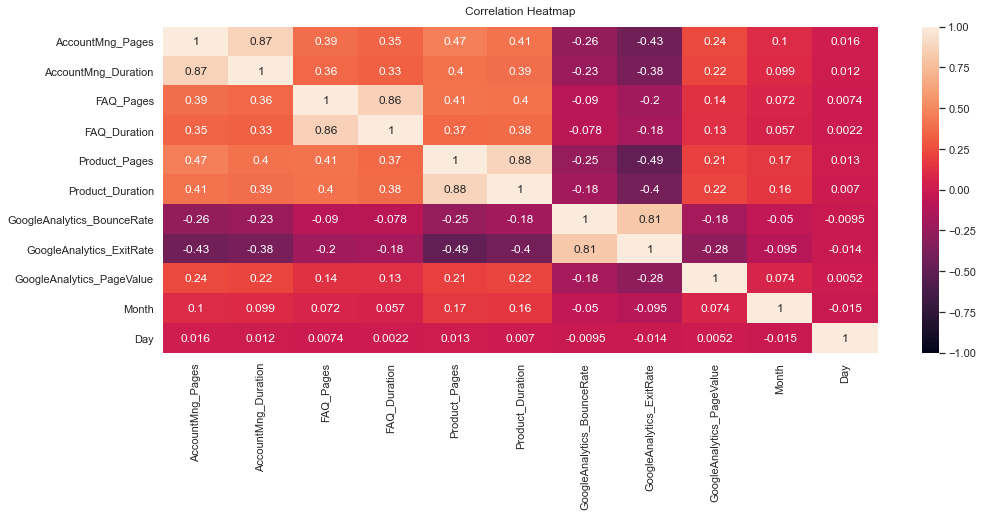

In [66]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_train_num.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

- remove AccountMng_Pages or AccountMng_Duration
- remove FAQ_Pages or FAQ_Duration
- remove Product_Pages or Product_Duration
- remove GoogleAnalytics_BounceRate or GoogleAnalytics_ExitRate

## Relevancy: 

### 1) Filter methods

#### 1.2) Univariate variables

In [131]:
X_train_num.var()

AccountMng_Pages              1.000118
AccountMng_Duration           1.000118
FAQ_Pages                     1.000118
FAQ_Duration                  1.000118
Product_Pages                 1.000118
Product_Duration              1.000118
GoogleAnalytics_BounceRate    1.000118
GoogleAnalytics_ExitRate      1.000118
GoogleAnalytics_PageValue     1.000118
Month                         1.000118
Day                           1.000118
dtype: float64

#### 1.3) Spearman Correlation

In [68]:
all_train_num = X_train_num.join(y_train)
all_train_num.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Month,Day,Buy
6690,-0.931589,-0.823998,-0.493283,-0.429267,-0.462649,-0.008507,-0.746176,-0.558760,-0.463902,-1.365833,0.826744,0
7910,-0.931589,-0.823998,-0.493283,-0.429267,-1.183203,-1.061951,2.994723,2.708625,-0.463902,-0.189036,-1.110155,0
971,-0.931589,-0.823998,-0.493283,-0.429267,-0.977294,-1.172553,1.124274,1.362710,-0.463902,-1.365833,0.826744,0
1528,0.870282,0.630533,-0.493283,-0.429267,-0.568743,-0.739619,-0.746176,-1.886618,-0.463902,0.987760,-0.084738,0
1415,-0.030654,-0.404983,-0.493283,-0.429267,0.829962,0.343416,-0.746176,-0.462834,-0.463902,-0.777435,1.510356,0


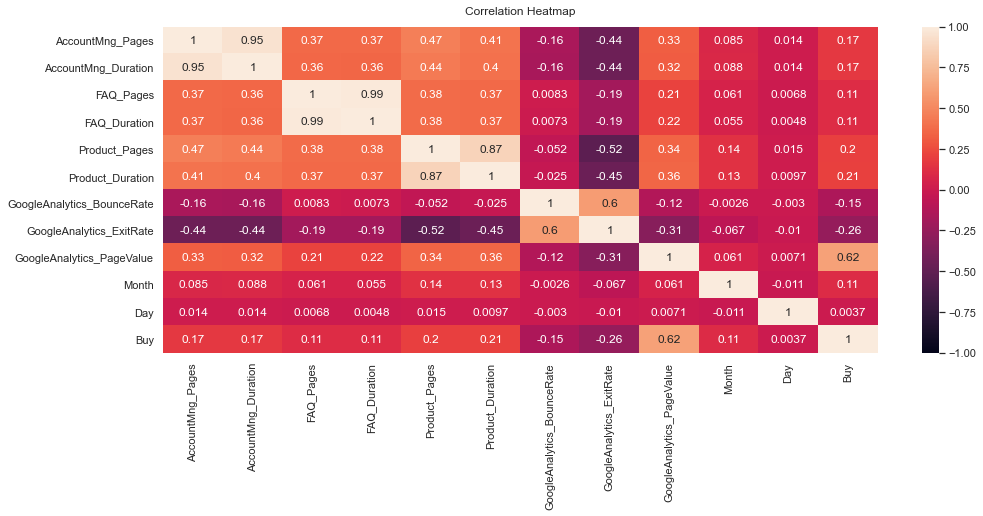

In [69]:
import matplotlib.pyplot as plt
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(all_train_num.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### 2) Wrapper Methods

#### 2.1) RFE: Recursive Feature Elimination

In [70]:
### Determining the number of features to include: 
#no of features
nof_list=np.arange(1,11)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num,y_train)
    X_val_rfe = rfe.transform(X_val_num)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.897333


In [71]:
# Apply RFE with 2 features: 
rfe=RFE(estimator=model, n_features_to_select=2)
X_rfe= rfe.fit_transform(X=X_train_num, y=y_train)
selected_features = pd.Series(rfe.support_, index = X_train_num.columns)
selected_features

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration              False
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
Month                         False
Day                           False
dtype: bool

### 3) Embedded Methods

#### 3.1) Lasso Regression

In [72]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [73]:
reg = LassoCV()
reg.fit(X_train_num, y_train)
coef = pd.Series(reg.coef_, index = X_train_num.columns)
coef

AccountMng_Pages             -0.007744
AccountMng_Duration           0.000000
FAQ_Pages                    -0.000000
FAQ_Duration                  0.002451
Product_Pages                 0.000794
Product_Duration              0.014098
GoogleAnalytics_BounceRate   -0.007169
GoogleAnalytics_ExitRate     -0.013898
GoogleAnalytics_PageValue     0.214392
Month                         0.025139
Day                           0.000000
dtype: float64

In [74]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 3 variables


In [75]:
coef.sort_values()

GoogleAnalytics_ExitRate     -0.013898
AccountMng_Pages             -0.007744
GoogleAnalytics_BounceRate   -0.007169
AccountMng_Duration           0.000000
FAQ_Pages                    -0.000000
Day                           0.000000
Product_Pages                 0.000794
FAQ_Duration                  0.002451
Product_Duration              0.014098
Month                         0.025139
GoogleAnalytics_PageValue     0.214392
dtype: float64

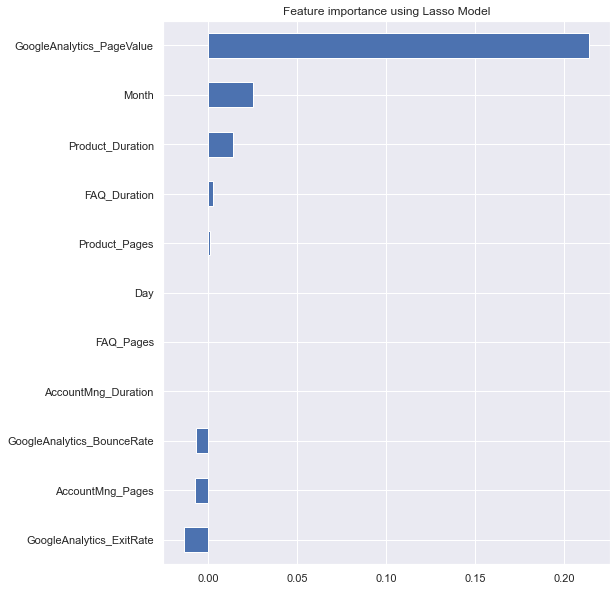

In [76]:
plot_importance(coef,'Lasso')

#### 3.2) Decision Tree Feature Importances:  

In [133]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train_num, y_train)
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: GoogleAnalytics_PageValue Importance: 0.43
Variable: Product_Duration     Importance: 0.11
Variable: GoogleAnalytics_ExitRate Importance: 0.1
Variable: GoogleAnalytics_BounceRate Importance: 0.07
Variable: Product_Pages        Importance: 0.06
Variable: Day                  Importance: 0.06
Variable: AccountMng_Duration  Importance: 0.05
Variable: Month                Importance: 0.05
Variable: AccountMng_Pages     Importance: 0.04
Variable: FAQ_Duration         Importance: 0.03
Variable: FAQ_Pages            Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

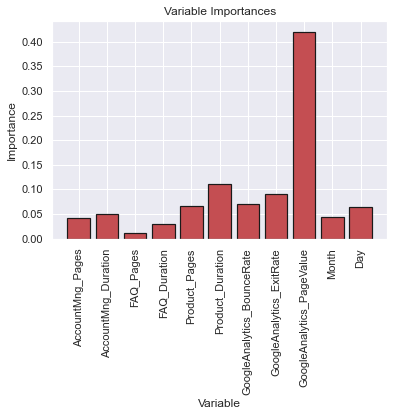

In [78]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Final Insights:

<hr>

### Numerical Data

| Predictor | Spearman | RFE | Lasso | Decsion Tree | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |--- |
| AccountMng_Pages | Discard | Discard | Keep | Keep | Try with and without |
| AccountMng_Duration | Discard | Discard | Discard |Keep | Discard |
| FAQ_Pages | Discard | Discard | Discard | Keep | Discard |
| FAQ_Duration | Discard | Discard | Keep | Keep | Try with and without |
| Product_Pages | Discard | Discard | Discard | Keep | Discard |
| Product_Duration | Discard | Discard | Keep | Keep | Try with and without |
| GoogleAnalytics_BounceRate | Discard | Discard | Keep |  Keep | Keep |
| GoogleAnalytics_ExitRate | Discard | Keep | Keep | Keep |  Keep |
| GoogleAnalytics_PageValue | Keep | Keep | Keep | Keep |  Keep |
| Month | Discard | Keep | Keep | Keep |  Keep |
| Day | Discard | Discard | Discard | Keep |  Discard |


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| OS | Keep |  
| Browser | Discard | 
| Country | Discard|
| Type_of_Traffic | Keep | 
| Type_of_Visitor | Keep | 

<hr>


In [79]:
#Removing the unnecessary columns:
X_train=X_train.drop(['Access_ID', 'AccountMng_Pages', 'FAQ_Pages', 'Product_Pages',
                    'GoogleAnalytics_BounceRate'], axis=1)
X_val=X_val.drop(['Access_ID', 'AccountMng_Pages', 'FAQ_Pages', 'Product_Pages',
                    'GoogleAnalytics_BounceRate'], axis=1)


In [80]:
X_train

,AccountMng_Duration,FAQ_Duration,Product_Duration,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Month,Day,x0_Chrome OS,x0_Fedora,x0_MacOSX,...,x1_8,x1_9,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x2_Other,x2_Returner
6690,-0.823998,-0.429267,-0.008507,-0.558760,-0.463902,-1.365833,0.826744,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7910,-0.823998,-0.429267,-1.061951,2.708625,-0.463902,-0.189036,-1.110155,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
971,-0.823998,-0.429267,-1.172553,1.362710,-0.463902,-1.365833,0.826744,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1528,0.630533,-0.429267,-0.739619,-1.886618,-0.463902,0.987760,-0.084738,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1415,-0.404983,-0.429267,0.343416,-0.462834,-0.463902,-0.777435,1.510356,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8408,0.470322,1.873898,0.483711,0.236663,-0.463902,-0.777435,-0.312608,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5902,1.711822,-0.429267,-0.460950,-0.828714,2.433657,0.987760,-0.768349,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
959,0.593084,-0.429267,-0.953162,-0.500407,-0.463902,-0.777435,-0.654414,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8513,-0.432045,-0.429267,0.079273,-0.619797,-0.463902,0.693561,-0.996220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
#Removing the unnecessary columns:

#Saving AccessID for the kaggle submission
Access_ID = pd.DataFrame(test.Access_ID)
test=test.drop(['Access_ID', 'AccountMng_Pages', 'FAQ_Pages', 'Product_Pages',
                    'GoogleAnalytics_BounceRate'], axis=1)

### SMOTE implementation: 

In [130]:
##oversample = SMOTE()
##data_train, target = oversample.fit_resample(data_train, target)

In [133]:
#Resplit:
##X_train, X_val, y_train, y_val = train_test_split(data_train,target, test_size = 0.15, random_state = 0, stratify = target, shuffle = True)

## Modeling: 

### Test Modeling: 

### KNN: 

In [208]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X = X_train, y = y_train)
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.6928327645051194
0.5985748218527316


In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Test states')
    plt.xlabel('Predicted states')
    plt.tight_layout()

Confusion matrix, without normalization
[[1205   62]
 [ 107  126]]


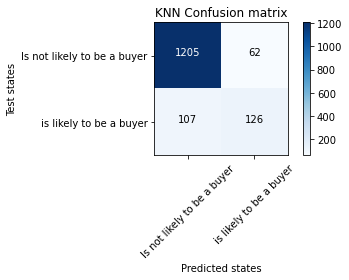

In [66]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='KNN Confusion matrix')

#### KNN Hyperparameter Tuning: 

In [65]:
# Look at parameters used by our current knn model
print('Parameters currently in use:\n')
pprint(modelKNN.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [66]:
error_rate = []

for i in range(1,50):
    
    modelKNN = KNeighborsClassifier(n_neighbors=i)
    modelKNN.fit(X_train,y_train)
    pred_i = modelKNN.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Error Rate')

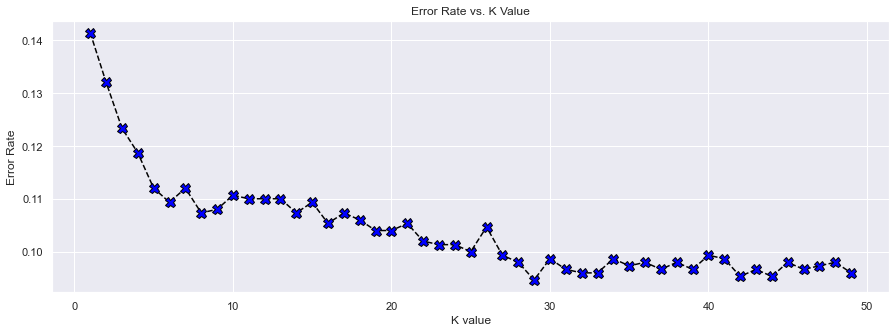

In [126]:
plt.figure(figsize=(15,5))
plt.plot(range(1,50),error_rate,color='black', linestyle='dashed', marker='X',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [54]:
#Parameter tuning with GridSearchCV 
modelKNN = KNeighborsClassifier()

# Algorithm
algorithm = ['auto', 'brute','kd_tree']
# number of neighbors
n_neighbors = [27,28,29,30]
# Leaf size
leaf_size= [20,30,40,1]
#P
p= [ 1,2]
#Weights
weights= ['uniform', 'distance']
#Metric
metric=['minkowski', 'euclidean', 'manhattan']



# Create the random grid
knn_grid_par = {'algorithm': algorithm,
               'n_neighbors': n_neighbors,
               'leaf_size': leaf_size,
               'p':p,
               'weights': weights,
               'metric': metric
               }
pprint(knn_grid_par)

{'algorithm': ['auto', 'brute', 'kd_tree'],
 'leaf_size': [20, 30, 40, 1],
 'metric': ['minkowski', 'euclidean', 'manhattan'],
 'n_neighbors': [27, 28, 29, 30],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}


In [55]:
knn_grid = GridSearchCV(estimator = modelKNN,
                          param_grid=knn_grid_par, 
                          scoring = 'f1',
                          cv = 5, verbose=2, n_jobs = -1
                         )
# Fit the random search model
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'brute', 'kd_tree'],
                         'leaf_size': [20, 30, 40, 1],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [27, 28, 29, 30], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=2)

In [56]:
#Get best param: 
knn_grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 30,
 'p': 2,
 'weights': 'distance'}

In [57]:
knn_grid_best = knn_grid.best_estimator_
knn_grid_labels = knn_grid_best.predict(X_val)
knngrid_score = f1_score(y_val, knn_grid_labels)
print('F1_score (Best knngrid): ', "%.2f" % (knngrid_score*100))
knn_score = f1_score(y_val, labels_val)
print('knn f1_score: ', "%.2f" % (knn_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((knngrid_score - knn_score) / knn_score)))

F1_score (Best knngrid):  64.00
knn f1_score:  59.86
Improvement of 6.92%.


Confusion matrix, without normalization
[[1228   39]
 [ 105  128]]


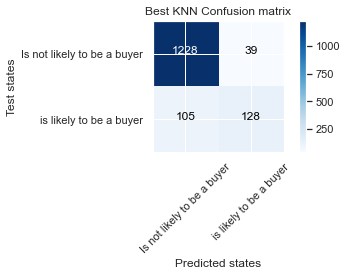

In [58]:
cnf_matrix = confusion_matrix(y_val, knn_grid_labels)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Best KNN Confusion matrix')

In [59]:
from sklearn import metrics
print(metrics.classification_report(y_val, knn_grid_labels))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1267
           1       0.77      0.55      0.64       233

    accuracy                           0.90      1500
   macro avg       0.84      0.76      0.79      1500
weighted avg       0.90      0.90      0.90      1500



### Logistic Regression: 

In [67]:
LG = LogisticRegression().fit(X_train,y_train)
labels_train = LG.predict(X_train)
labels_val = LG.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.5768364127985579
0.6165413533834586


Confusion matrix, without normalization
[[1224   43]
 [ 110  123]]


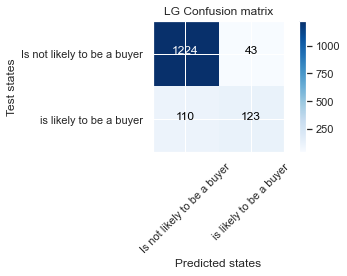

In [68]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='LG Confusion matrix')

#### Logistic regression hyperparameter tuning: 

In [69]:
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_lg = GridSearchCV(LG, param_grid = grid_values,scoring = 'f1', cv = 5, verbose=2, n_jobs = -1)
grid_lg.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=2)

In [70]:
#Get best param: 
grid_lg.best_params_

{'C': 1, 'penalty': 'l2'}

In [71]:
LG_grid_best = grid_lg.best_estimator_
LG_grid_labels = LG_grid_best.predict(X_val)
lggrid_score = f1_score(y_val, LG_grid_labels)
print('F1_score (Best lggrid): ', "%.2f" % (lggrid_score*100))
lg_score = f1_score(y_val, labels_val)
print('LG f1_score: ', "%.2f" % (lg_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((lggrid_score - lg_score) / lg_score)))

F1_score (Best lggrid):  61.65
LG f1_score:  61.65
Improvement of 0.00%.


In [72]:
from sklearn import metrics
print(metrics.classification_report(y_val, LG_grid_labels))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1267
           1       0.74      0.53      0.62       233

    accuracy                           0.90      1500
   macro avg       0.83      0.75      0.78      1500
weighted avg       0.89      0.90      0.89      1500



### SVM: 

In [73]:
linear=svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [74]:
linear_pred=linear.predict(X_val)
poly_pred = poly.predict(X_val)
rbf_pred = rbf.predict(X_val)

In [75]:
linear_f1 = f1_score(y_val, linear_pred)
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_f1*100))
poly_f1 = f1_score(y_val, poly_pred)
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
rbf_f1 = f1_score(y_val, rbf_pred)
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (Linear Kernel):  62.00
Accuracy (Polynomial Kernel):  60.42
Accuracy (RBF Kernel):  39.46


Confusion matrix, without normalization
[[1204   63]
 [ 100  133]]


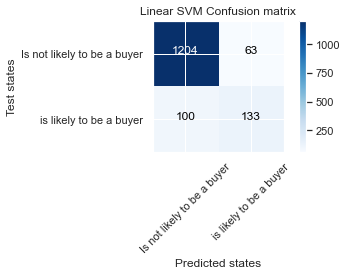

In [76]:
cnf_matrix = confusion_matrix(y_val, linear_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Linear SVM Confusion matrix')

Confusion matrix, without normalization
[[1232   35]
 [ 117  116]]


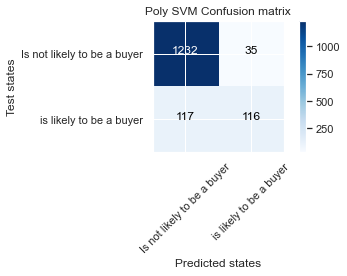

In [77]:
cnf_matrix = confusion_matrix(y_val, poly_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Poly SVM Confusion matrix')

Confusion matrix, without normalization
[[1260    7]
 [ 174   59]]


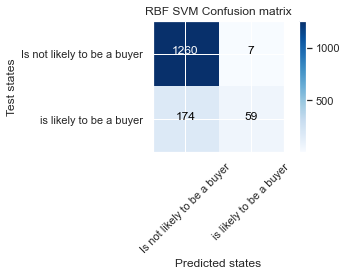

In [78]:
cnf_matrix = confusion_matrix(y_val, rbf_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='RBF SVM Confusion matrix')

#### SVM Hyperparameter Tuning: 

Running different types of algorithms took a lot of time, so we decided to work on each algorithm on its own

**RBF**

In [80]:
modelsvm=svm.SVC()
# Regularisation
C = [0.1,1, 10, 100]
# Gamma
gamma = [1,0.1,0.01,0.001]
#Kernel
kernel=['rbf']
# Create the random grid
svm_grid_par = {'C': C,
               'gamma': gamma,
               'kernel': kernel,
               }
pprint(svm_grid_par)

{'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}


In [81]:
svm_grid = GridSearchCV(estimator = modelsvm, param_grid = svm_grid_par, scoring = 'f1',
                        cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
svm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='f1', verbose=2)

In [82]:
#Get best param: 
svm_grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [83]:
svm_grid_best = svm_grid.best_estimator_
svm_grid_labels = svm_grid_best.predict(X_val)
svmgrid_score = f1_score(y_val, svm_grid_labels)
print('F1_score (Best svmgrid): ', "%.2f" % (svmgrid_score*100))

F1_score (Best svmgrid):  65.54


Confusion matrix, without normalization
[[1221   46]
 [  97  136]]


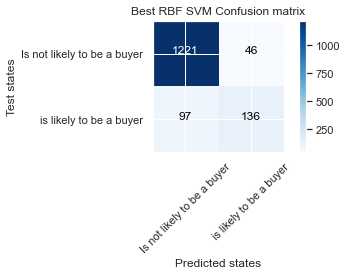

In [84]:
cnf_matrix = confusion_matrix(y_val, svm_grid_labels)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Best RBF SVM Confusion matrix')

In [85]:
from sklearn import metrics
print(metrics.classification_report(y_val, svm_grid_labels))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1267
           1       0.75      0.58      0.66       233

    accuracy                           0.90      1500
   macro avg       0.84      0.77      0.80      1500
weighted avg       0.90      0.90      0.90      1500



**Linear**

In [87]:
modelsvm=svm.SVC()
# Regularisation
C = [0.1,1, 10, 100]
# Gamma
gamma = [1,0.1,0.01,0.001]
# Kernel
kernel= ['linear']
# Create the random grid
svm_grid_par = {'C': C,
               'gamma': gamma,
               'kernel': kernel,
               }
pprint(svm_grid_par)

{'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']}


In [89]:
svm_grid = GridSearchCV(estimator = modelsvm, param_grid = svm_grid_par, scoring = 'f1',
                        cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
svm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             scoring='f1', verbose=2)

In [90]:
#Get best param: 
svm_grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [92]:
svm_grid_best = svm_grid.best_estimator_
svm_grid_labels = svm_grid_best.predict(X_val)
svmgrid_score = f1_score(y_val, svm_grid_labels)
print('F1_score (Best svmgrid): ', "%.2f" % (svmgrid_score*100))

F1_score (Best svmgrid):  61.94


Confusion matrix, without normalization
[[1208   59]
 [ 102  131]]


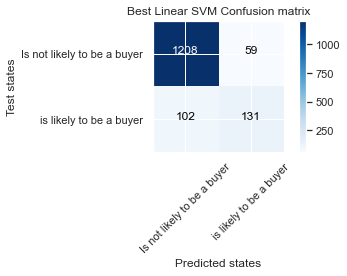

In [93]:
cnf_matrix = confusion_matrix(y_val, svm_grid_labels)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Best Linear SVM Confusion matrix')

### Decision Tree: 

In [86]:
DT = DecisionTreeClassifier()
DT.fit(X = X_train, y = y_train)

DecisionTreeClassifier()

In [87]:
labels_train = DT.predict(X_train)
labels_val = DT.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

1.0
0.5843621399176954


Confusion matrix, without normalization
[[1156  111]
 [  91  142]]


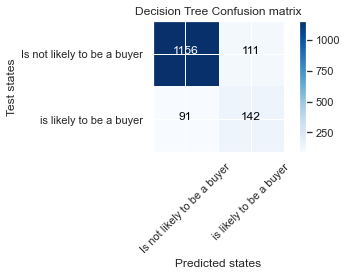

In [88]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Decision Tree Confusion matrix')

In [69]:
print('Parameters currently in use:\n')
pprint(DT.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


#### Decision Tree Hyperparameter Tuning: 

In [89]:
DT = DecisionTreeClassifier()

# Number of features to consider at every split
max_features = ['None','auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,200]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#max_leaf_nodes
max_leaf_nodes=[5]
max_leaf_nodes.append(None)
#Criterion:
criterion= ['entropy', 'gini']
#Splitter: 
splitter= ['best', 'random']
# Create the random grid
DT_grid_par = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes':max_leaf_nodes,
              'criterion': criterion, 
              'splitter': splitter
}
pprint(DT_grid_par)

{'criterion': ['entropy', 'gini'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['None', 'auto', 'sqrt'],
 'max_leaf_nodes': [5, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10, 200],
 'splitter': ['best', 'random']}


In [121]:
DT_grid = GridSearchCV(estimator = DT,
                          param_grid=DT_grid_par, 
                          scoring = 'f1',
                           cv = 3, verbose=2,  n_jobs = -1
                         )
# Fit the grid search model
DT_grid.fit(X_train, y_train)

Fitting 3 folds for each of 3456 candidates, totalling 10368 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['None', 'auto', 'sqrt'],
                         'max_leaf_nodes': [5, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 200],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=2)

In [122]:
DT_grid.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'min_samples_split': 200,
 'splitter': 'best'}

In [123]:
DT_best_grid = DT_grid.best_estimator_
DT_grid_labels = DT_best_grid.predict(X_val)
DT_grid_score = f1_score(y_val, DT_grid_labels)
print('F1_score (Best DT_grid): ', "%.2f" % (DT_grid_score*100))
DT_score = f1_score(y_val, labels_val)
print('DT f1_score: ', "%.2f" % (DT_score*100))

F1_score (Best DT_grid):  61.20
DT f1_score:  58.44


Confusion matrix, without normalization
[[1187   80]
 [  95  138]]


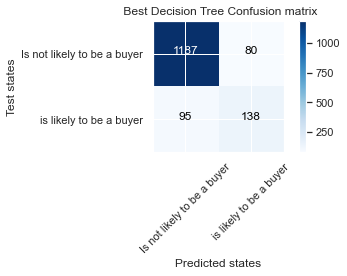

In [124]:
cnf_matrix = confusion_matrix(y_val, DT_grid_labels)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title=' Best Decision Tree Confusion matrix')

In [125]:
from sklearn import metrics
print(metrics.classification_report(y_val, DT_grid_labels))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1267
           1       0.63      0.59      0.61       233

    accuracy                           0.88      1500
   macro avg       0.78      0.76      0.77      1500
weighted avg       0.88      0.88      0.88      1500



### Neural Networks

In [82]:
MLP = MLPClassifier().fit(X_train, y_train)
labels_train = MLP.predict(X_train)
labels_val = MLP.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.7395790342550557
0.6241457858769932


Confusion matrix, without normalization
[[1204   63]
 [ 101  132]]


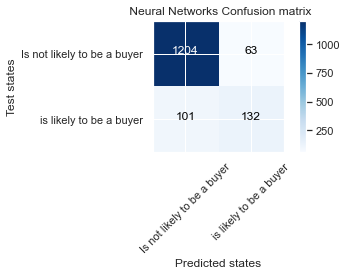

In [127]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title=' Neural Networks Confusion matrix')

In [110]:
print('Parameters currently in use:\n')
pprint(MLP.get_params())

Parameters currently in use:

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


#### neural Networks Hyperparameter Tuning: 

In [83]:
X=X_train.copy()
y=y_train.copy()
def avg_score(model):
    # apply kfold
    skf = StratifiedKFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in skf.split(X,y):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the validation
        value_val = model.score(X_val,y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_iter = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_iter
        count+=1
    return df

In [104]:
#The hidden layer
model_simple = MLPClassifier(hidden_layer_sizes=(1))
model_medium = MLPClassifier(hidden_layer_sizes=(8))
model_complex = MLPClassifier(hidden_layer_sizes=(100,100,100,100))

df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Simple','Medium','Complex'])
show_results(df, model_simple, model_medium, model_complex)

,Time,Train,Validation,Iterations
Simple,1.801+/-0.51,0.89+/-0.0,0.888+/-0.01,152.4+/-44.0
Medium,4.183+/-0.14,0.903+/-0.0,0.892+/-0.01,196.1+/-5.8
Complex,17.945+/-2.28,0.993+/-0.01,0.869+/-0.01,99.5+/-12.0


In [105]:
#The maximum iterations
model_maxiter_20 = MLPClassifier(max_iter = 20, hidden_layer_sizes=(8))
model_maxiter_200 = MLPClassifier(max_iter = 200, hidden_layer_sizes=(8))
model_maxiter_1000 = MLPClassifier(max_iter = 1000, hidden_layer_sizes=(8))
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['max iter 20','max iter 200','max iter 1000'])
show_results(df, model_maxiter_20, model_maxiter_200, model_maxiter_1000)

,Time,Train,Validation,Iterations
max iter 20,0.325+/-0.03,0.891+/-0.0,0.889+/-0.01,20.0+/-0.0
max iter 200,4.727+/-0.58,0.903+/-0.0,0.897+/-0.01,191.0+/-13.1
max iter 1000,5.286+/-0.98,0.904+/-0.0,0.894+/-0.01,208.1+/-38.2


In [107]:
#The solver: 
model_lbfgs = MLPClassifier(max_iter=200 , hidden_layer_sizes=8 ,solver = 'lbfgs')
model_sgd = MLPClassifier(max_iter=200 , hidden_layer_sizes=8 ,solver = 'sgd')
model_adam = MLPClassifier(max_iter=200 , hidden_layer_sizes=8 ,solver = 'adam')

df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['lbfgs','sgd','adam'])
show_results(df, model_lbfgs, model_sgd, model_adam)

,Time,Train,Test,Iterations
lbfgs,0.537+/-0.03,0.906+/-0.0,0.893+/-0.01,200.0+/-0.0
sgd,2.823+/-0.35,0.892+/-0.0,0.892+/-0.01,129.0+/-13.3
adam,4.249+/-0.4,0.903+/-0.0,0.895+/-0.01,191.9+/-14.8


In [111]:
#The learning rate initialization
model_lr_big = MLPClassifier(learning_rate_init = 0.5, max_iter=200 , hidden_layer_sizes=8)
model_lr_medium = MLPClassifier(learning_rate_init = 0.001, max_iter=200 , hidden_layer_sizes=8)
model_lr_small = MLPClassifier(learning_rate_init = 0.000001, max_iter=200 , hidden_layer_sizes=8)

df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['big','medium','small'])
show_results(df, model_lr_big, model_lr_medium, model_lr_small)

,Time,Train,Test,Iterations
big,0.371+/-0.07,0.876+/-0.01,0.877+/-0.01,24.7+/-5.0
medium,4.477+/-0.52,0.904+/-0.0,0.898+/-0.01,195.8+/-8.9
small,3.434+/-2.07,0.655+/-0.19,0.659+/-0.2,143.6+/-86.2


In [130]:
#The activation function: 

model_relu=MLPClassifier(activation= 'relu',hidden_layer_sizes = 8 , max_iter = 200)
model_logistic=MLPClassifier(activation= 'logistic',hidden_layer_sizes = 8 , max_iter = 200)
model_tanh=MLPClassifier(activation= 'tanh',hidden_layer_sizes = 8 , max_iter = 200)

df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['relu','logistic','tanh'])
show_results(df, model_relu, model_logistic, model_tanh)

,Time,Train,Test,Iterations
relu,4.201+/-0.69,0.903+/-0.0,0.892+/-0.01,194.4+/-9.5
logistic,4.068+/-0.88,0.897+/-0.0,0.896+/-0.01,187.9+/-36.3
tanh,4.16+/-0.2,0.903+/-0.0,0.894+/-0.01,199.0+/-3.0


In [87]:
MLP = MLPClassifier(max_iter = 200, hidden_layer_sizes=(8), solver = 'adam')
MLP.fit(X_train, y_train)
labels_train = MLP.predict(X_train)
labels_val = MLP.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.653440270156184
0.6619385342789598


Confusion matrix, without normalization
[[1207   60]
 [  90  143]]


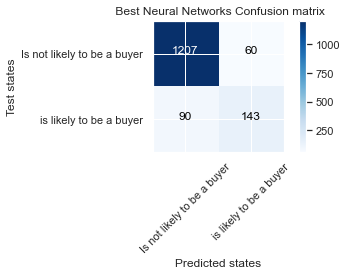

In [136]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title=' Best Neural Networks Confusion matrix')

In [88]:
from sklearn import metrics
print(metrics.classification_report(y_val, labels_val))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1267
           1       0.74      0.60      0.66       233

    accuracy                           0.90      1500
   macro avg       0.83      0.78      0.80      1500
weighted avg       0.90      0.90      0.90      1500



### Quadratic Discriminant Analysis:

In [209]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
labels_train = qda.predict(X_train)
labels_val = qda.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.27091715671102856
0.2715617715617716


In [210]:
print('Parameters currently in use:\n')
pprint(qda.get_params())

Parameters currently in use:

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}


Confusion matrix, without normalization
[[  17 1250]
 [   0  233]]


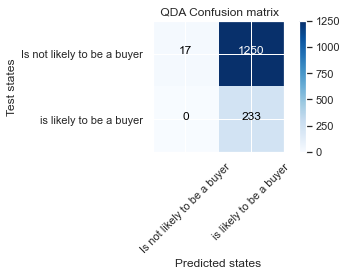

In [211]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title=' QDA Confusion matrix')

In [212]:
from sklearn import metrics
print(metrics.classification_report(y_val, labels_val))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03      1267
           1       0.16      1.00      0.27       233

    accuracy                           0.17      1500
   macro avg       0.58      0.51      0.15      1500
weighted avg       0.87      0.17      0.06      1500



### Ensemble Methods


### RandomForest

In [139]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

In [140]:
rf.fit(X = X_train, y = y_train)
labels_train = rf.predict(X_train)
labels_val = rf.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.9663799843627834
0.5918367346938777


Confusion matrix, without normalization
[[1224   43]
 [ 117  116]]


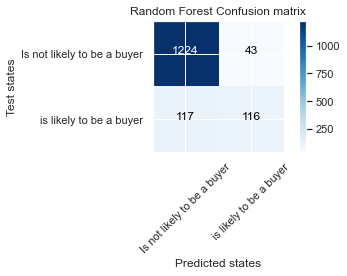

In [141]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Random Forest Confusion matrix')

#### Random Forest Hyperparameter Tuning

In [142]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [143]:
rf = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterion:
criterion= ['entropy', 'auto']
# Create the random grid
rf_rand_par = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion': criterion}
pprint(rf_rand_par)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'auto'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}


In [144]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_rand_par, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'auto'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, verbose=2)

In [145]:
rf_random.best_params_

{'n_estimators': 890,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

In [146]:
rf_best_random = rf_random.best_estimator_
rf_rand_labels = rf_best_random.predict(X_val)
rf_rand_score = f1_score(y_val, rf_rand_labels)
print('F1_score (Best rf_rand): ', "%.2f" % (rf_rand_score*100))
rf_score = f1_score(y_val, labels_val)
print('rf f1_score: ', "%.2f" % (rf_score*100))

F1_score (Best rf_rand):  66.82
rf f1_score:  59.18


In [147]:
labels_train = rf_best_random.predict(X_train)
labels_val = rf_best_random.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.9532858273950912
0.6682464454976303


In [178]:
rf=RandomForestClassifier(n_estimators = 890, criterion = 'entropy', min_samples_split= 5, min_samples_leaf= 1, 
                          max_features= 'sqrt', max_depth= 9, bootstrap= True, random_state = 42)

rf.fit(X = X_train, y = y_train)
labels_train = rf.predict(X_train)
labels_val = rf.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.7294117647058824
0.6532663316582914


Confusion matrix, without normalization
[[1232   35]
 [ 103  130]]


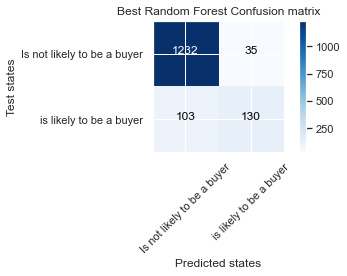

In [179]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Best Random Forest Confusion matrix')

In [180]:
from sklearn import metrics
print(metrics.classification_report(y_val, labels_val))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1267
           1       0.79      0.56      0.65       233

    accuracy                           0.91      1500
   macro avg       0.86      0.77      0.80      1500
weighted avg       0.90      0.91      0.90      1500



### GBClassifier

In [98]:
gb = GradientBoostingClassifier(learning_rate= 0.1, random_state = 5)

In [182]:
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 5,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [110]:
gb.fit(X = X_train, y = y_train)
labels_train = gb.predict(X_train)
labels_val = gb.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.7109826589595376
0.662004662004662


Confusion matrix, without normalization
[[1213   54]
 [  91  142]]


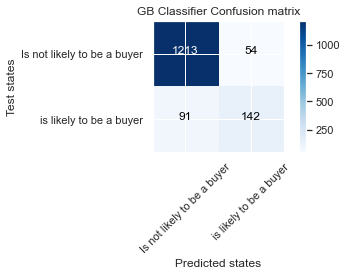

In [184]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='GB Classifier Confusion matrix')

#### GB Classifier Hyperparameter Tuning: 

In [87]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train, y_train)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

>0.001 0.000 (0.000)
>0.01 0.432 (0.053)
>0.1 0.652 (0.040)
>0.3 0.635 (0.035)
>0.5 0.613 (0.044)
>0.8 0.600 (0.036)
>1.0 0.593 (0.040)


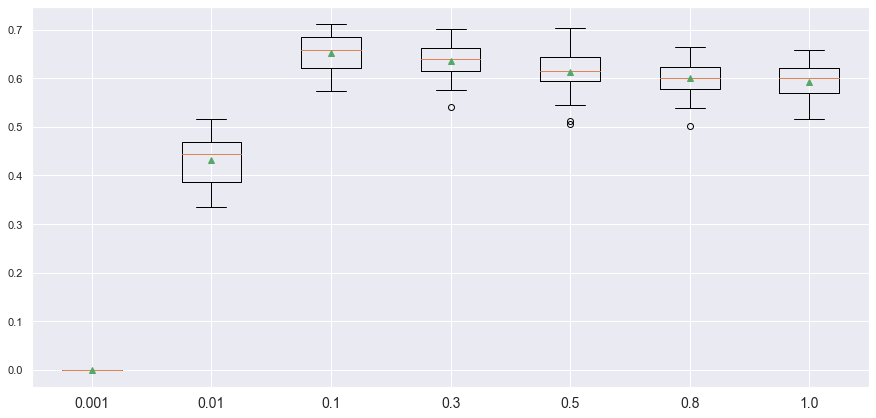

In [195]:
#Learning Rate

def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

>2 0.000 (0.000)
>5 0.007 (0.017)
>10 0.478 (0.051)
>20 0.607 (0.042)
>30 0.628 (0.038)
>50 0.648 (0.038)
>100 0.652 (0.040)
>150 0.651 (0.041)
>200 0.648 (0.040)
>500 0.636 (0.036)


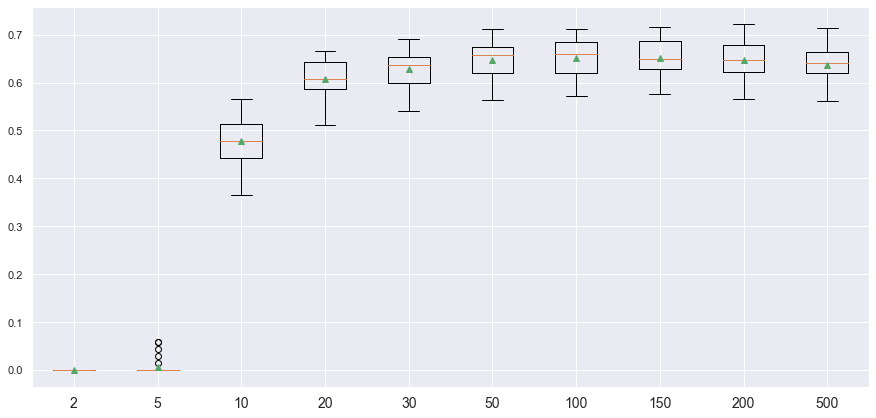

In [196]:
# n_estimators
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150,200,500])
return_results(models)

In [89]:
#Choosing number of estimators: 
param_test1 = {'n_estimators':range(50,151)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier( random_state = 15), 
param_grid = param_test1, scoring='f1',n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=15),
             n_jobs=4, param_grid={'n_estimators': range(50, 151)},
             scoring='f1')

In [90]:
 gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.6585309668111041)

>0.2 0.639 (0.040)
>0.4 0.648 (0.043)
>0.6 0.647 (0.037)
>0.8 0.653 (0.038)
>1.0 0.651 (0.041)


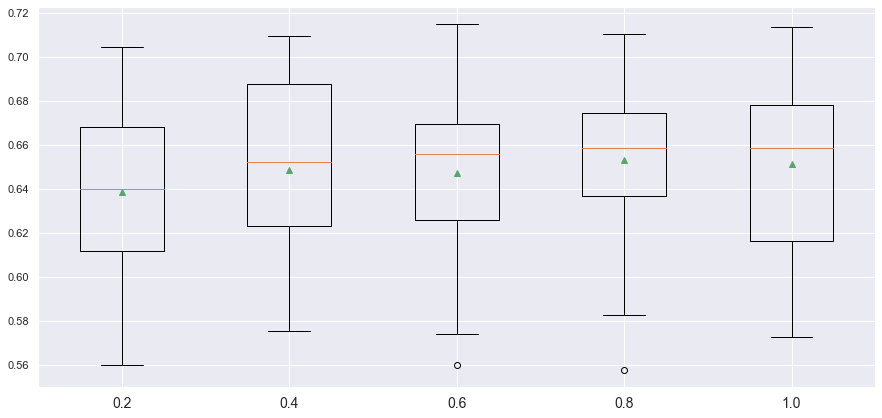

In [91]:
#subsample: 
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators =80, subsample = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,1.0])
return_results(models)

>2 0.487 (0.057)
>0.5 0.658 (0.039)
>sqrt 0.649 (0.041)
>log2 0.595 (0.038)
>None 0.653 (0.038)


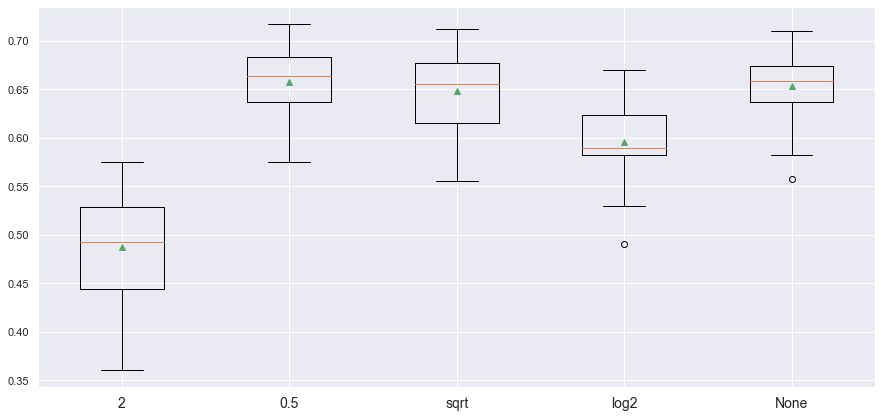

In [92]:
#max_features: 
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = value, random_state = 15)      
    return models

models = get_models([2,0.5,'sqrt','log2',None])
return_results(models)

>2 0.651 (0.037)
>3 0.658 (0.039)
>5 0.650 (0.036)
>10 0.636 (0.036)
>15 0.629 (0.037)


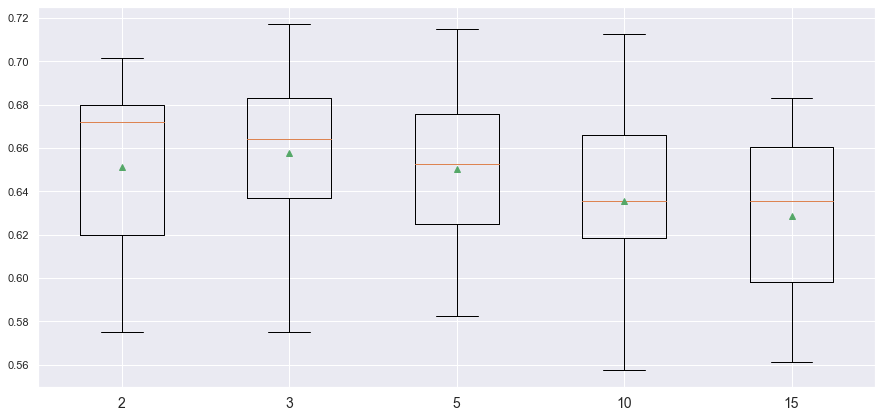

In [94]:
#max_depth: 
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = 0.5, max_depth=value, random_state = 15)      
    return models

models = get_models([2,3,5,10,15])
return_results(models)

>2 0.658 (0.039)
>10 0.656 (0.040)
>200 0.657 (0.042)
>1000 0.659 (0.040)


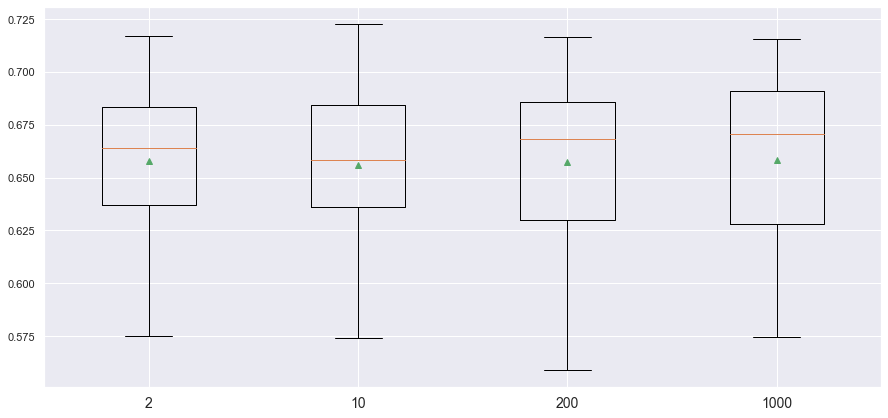

In [95]:
#min_samples_split:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = 0.5, min_samples_split=value, random_state = 15)      
    return models

models = get_models([2,10,200,1000])
return_results(models)

>1 0.659 (0.040)
>5 0.657 (0.039)
>30 0.658 (0.040)
>70 0.660 (0.041)
>90 0.659 (0.041)


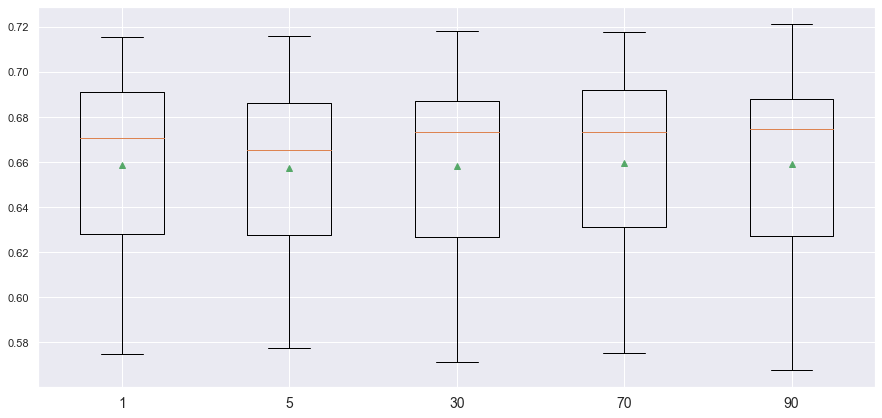

In [97]:
#Choosing the min_samples_leaf:

def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = 0.5, min_samples_split=1000,
                                                        
                                                         min_samples_leaf= value, random_state = 15)      
    return models

models = get_models([1, 5,30,70, 90])
return_results(models)

In [111]:
gb_best = GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = 0.5, min_samples_split=1000,
                                                         min_samples_leaf= 70, random_state = 15)
gb_best.fit(X_train, y_train)
gb_best_labels = gb_best.predict(X_val)
gbbest_score = f1_score(y_val, gb_best_labels)
print('F1_score (Best GB): ', "%.2f" % (gbbest_score*100))
gb_score = f1_score(y_val, labels_val)
print('knn f1_score: ', "%.2f" % (gb_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((gbbest_score - gb_score) / gb_score)))

F1_score (Best GB):  68.18
knn f1_score:  66.20
Improvement of 2.99%.


Confusion matrix, without normalization
[[1210   57]
 [  83  150]]


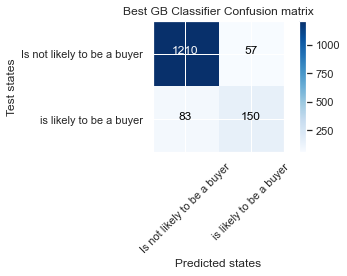

In [112]:
cnf_matrix = confusion_matrix(y_val, gb_best_labels)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Best GB Classifier Confusion matrix')

In [105]:
from sklearn import metrics
print(metrics.classification_report(y_val, gb_best_labels))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1267
           1       0.72      0.64      0.68       233

    accuracy                           0.91      1500
   macro avg       0.83      0.80      0.81      1500
weighted avg       0.90      0.91      0.90      1500



### AdaBoost Classifier: 

In [103]:
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)
labels_train = ada.predict(X_train)
labels_val = ada.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.6182266009852216
0.6205357142857142


Confusion matrix, without normalization
[[1191   76]
 [  94  139]]


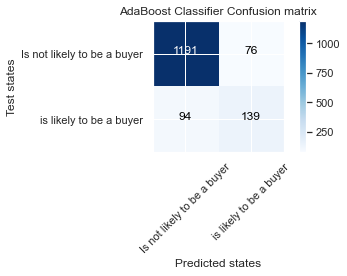

In [104]:
cnf_matrix = confusion_matrix(y_val, labels_val)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='AdaBoost Classifier Confusion matrix')

#### AdaBoost Classifier Hyperparameter Tuning: 

In [106]:
print('Parameters currently in use:\n')
pprint(ada.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


>1 0.603 (0.038)
>2 0.625 (0.045)
>3 0.591 (0.033)
>4 0.568 (0.044)
>5 0.557 (0.039)
>6 0.551 (0.035)
>7 0.564 (0.042)
>8 0.582 (0.038)
>9 0.582 (0.035)
>10 0.588 (0.044)
>11 0.600 (0.036)
>12 0.591 (0.044)


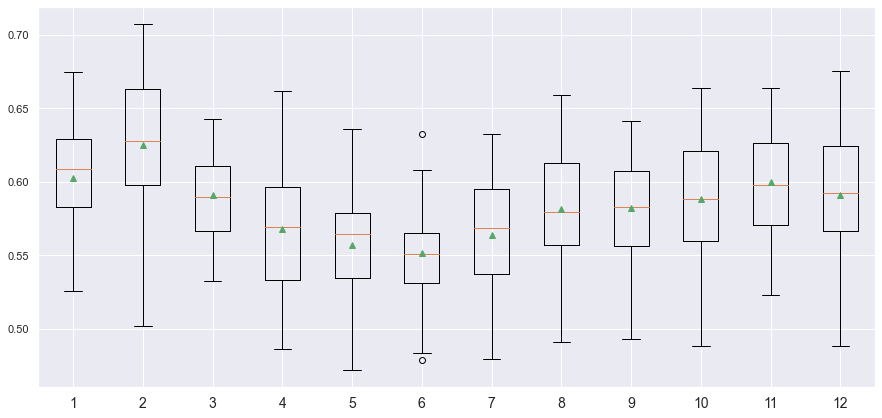

In [112]:
#Changing the max_depth
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=value), random_state = 15)      
    return models

models = get_models([1,2,3,4,5,6,7,8,9,10,11,12])
return_results(models)

>ad_LR 0.522 (0.032)
>ad_DT 0.625 (0.045)
>ad_def 0.603 (0.038)


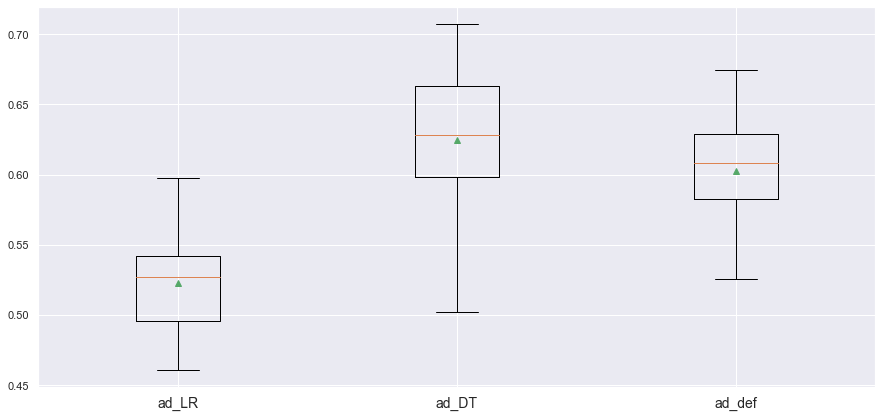

In [115]:
#Changing the model: 

def get_models():
    models = dict()
    models['ad_LR'] = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=500), random_state = 15)  
    models['ad_DT'] = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2), random_state = 15)  
    models['ad_def']=AdaBoostClassifier(random_state = 15)  
    return models

models = get_models()
return_results(models)

>2 0.646 (0.041)
>5 0.640 (0.047)
>10 0.641 (0.045)
>20 0.639 (0.046)
>30 0.639 (0.047)
>50 0.625 (0.045)
>100 0.607 (0.042)
>150 0.595 (0.046)


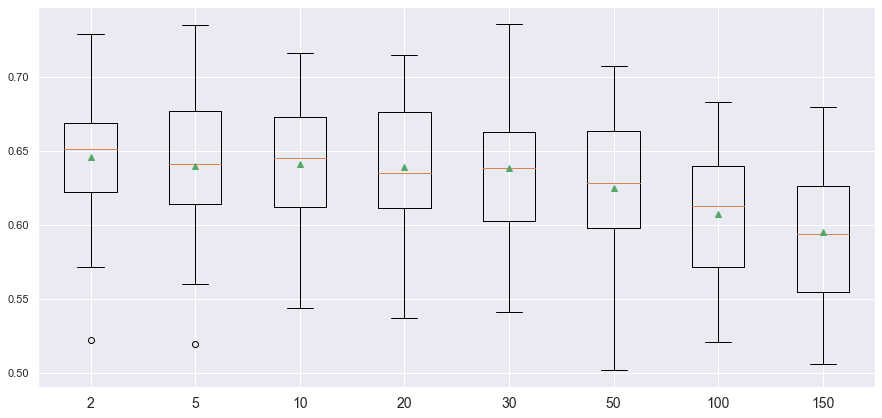

In [116]:
#Changing the number of estimator: 
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150])
return_results(models)

>0.1 0.556 (0.055)
>0.2 0.588 (0.054)
>0.3 0.591 (0.046)
>0.4 0.585 (0.045)
>0.5 0.584 (0.046)
>0.6 0.582 (0.045)
>0.7 0.578 (0.044)
>0.8 0.569 (0.067)
>0.9 0.562 (0.071)
>1.0 0.646 (0.041)


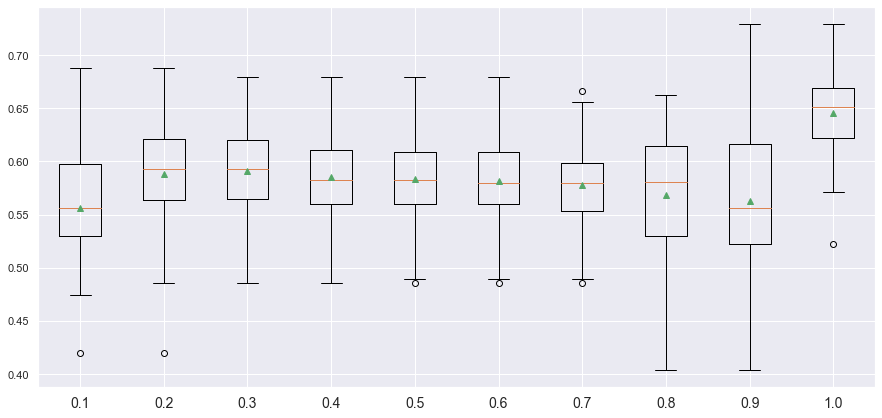

In [118]:
#Change the learning rate
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),n_estimators =2, 
                                                learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

>SAMME 0.518 (0.058)
>SAMME.R 0.646 (0.041)


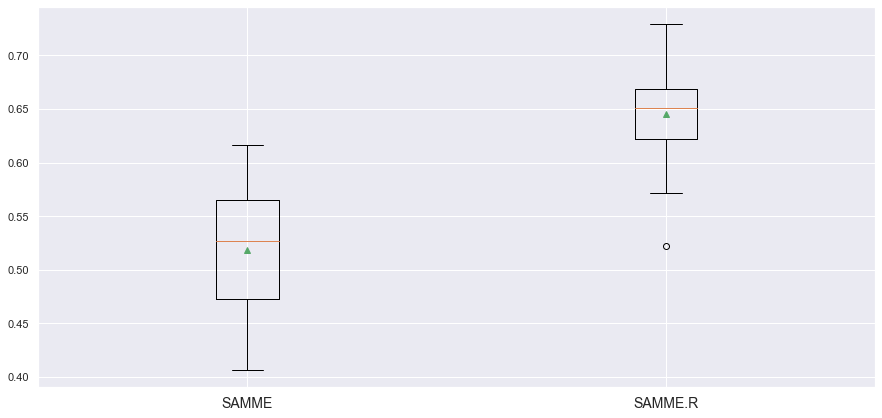

In [119]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),n_estimators =2,
                                                algorithm = value, random_state = 15)      
    return models

models = get_models(["SAMME","SAMME.R"])
return_results(models)

In [108]:
ada=AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),n_estimators =2, random_state = 15)
ada.fit(X_train, y_train)
ada_best_labels=ada.predict(X_val)
adabest_score = f1_score(y_val, ada_best_labels)

print('F1_score (Best Ada): ', "%.2f" % (adabest_score*100))
ada_score = f1_score(y_val, labels_val)
print('knn f1_score: ', "%.2f" % (ada_score*100))
print('Improvement of {:0.2f}%.'.format( 100 * ((adabest_score - ada_score) / ada_score)))

F1_score (Best Ada):  64.66
knn f1_score:  62.05
Improvement of 4.20%.


Confusion matrix, without normalization
[[1140  127]
 [  61  172]]


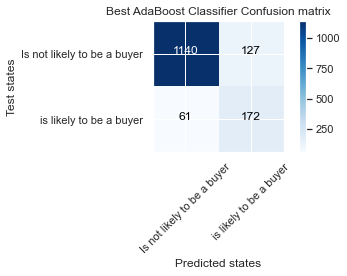

In [109]:
### TO BE CHANGED
cnf_matrix = confusion_matrix(y_val, ada_best_labels)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Is not likely to be a buyer', 'is likely to be a buyer'],
                      title='Best AdaBoost Classifier Confusion matrix')

In [113]:
from sklearn import metrics
print(metrics.classification_report(y_val, ada_best_labels))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1267
           1       0.58      0.74      0.65       233

    accuracy                           0.87      1500
   macro avg       0.76      0.82      0.79      1500
weighted avg       0.89      0.87      0.88      1500



### ROC CURVE: 

In [85]:
DT=DecisionTreeClassifier(criterion='entropy', max_depth= 60, max_features='sqrt', max_leaf_nodes=5,
     min_samples_leaf= 1, min_samples_split= 5,  splitter= 'random', random_state=14)
DT.fit(X_train, y_train)
labels_train = DT.predict(X_train)
labels_val = DT.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_val, y_val))

0.6522851919561243
0.6503067484662577


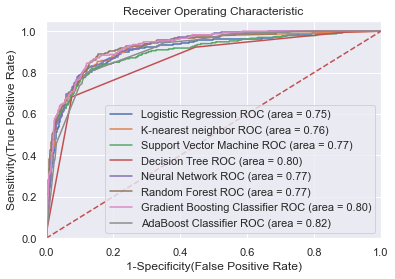

In [115]:
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(C=1, penalty='l2'),
},
{
    'label': 'K-nearest neighbor',
    'model': KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski', n_neighbors=30, p=2, weights='distance'),
}, 
    
    {
    'label': 'Support Vector Machine',
    'model': svm.SVC(kernel='rbf', C=10, gamma=0.01, probability=True),
} ,  
 {
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(criterion='entropy', max_depth= 60, max_features='sqrt', max_leaf_nodes=5,
     min_samples_leaf= 1, min_samples_split= 5,  splitter= 'random', random_state=14)
} , 
    {
    'label': 'Neural Network',
    'model': MLPClassifier(max_iter = 200, hidden_layer_sizes=(8), solver = 'adam')
} , 
    
    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 890, criterion = 'entropy', min_samples_split= 5, min_samples_leaf= 1, 
                          max_features= 'sqrt', max_depth= 9, bootstrap= True, random_state = 42)
}, 
    
    {
    'label': 'Gradient Boosting Classifier',
    'model': GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = 0.5, min_samples_split=1000,
                                                         min_samples_leaf= 70, random_state = 15)
},
    {
    'label': 'AdaBoost Classifier',
    'model': AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),n_estimators =2, random_state = 15)
}
    
    
    
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_val) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_val, model.predict_proba(X_val)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_val,model.predict(X_val))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

### Stacking:

In [107]:
lr = LogisticRegression(C=1, penalty='l2').fit(X_train, y_train)
kn = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski', n_neighbors=30, p=2, weights='distance').fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 60, max_features='sqrt', max_leaf_nodes=5,
     min_samples_leaf= 1, min_samples_split= 5,  splitter= 'random', random_state=14).fit(X_train, y_train)
nn = MLPClassifier(max_iter = 200, hidden_layer_sizes=(8), solver = 'adam').fit(X_train, y_train)
ab = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),n_estimators =2, random_state = 15).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators = 670, criterion = 'entropy', min_samples_split= 5, min_samples_leaf= 4, 
                          max_features= 'sqrt', max_depth= 80, bootstrap= True, random_state = 42).fit(X_train, y_train)
gb = GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = 0.5, min_samples_split=1000,
                                                         min_samples_leaf= 70, random_state = 15).fit(X_train, y_train)
sv=svm.SVC(kernel='rbf', C=10, gamma=0.01, probability=True).fit(X_train, y_train)

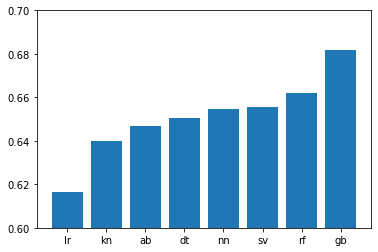

In [108]:
accuracies = [f1_score(y_val, lr.predict(X_val)),  
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, sv.predict(X_val))]
models = ['lr','kn','dt','nn','ab','rf','gb', 'sv']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.60,0.7)
plt.show()

In [110]:
estimators = [('gb', GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = 0.5, min_samples_split=1000,
                                                         min_samples_leaf= 70, random_state = 15)),
              ('rf', RandomForestClassifier(n_estimators = 670, criterion = 'entropy', min_samples_split= 5, min_samples_leaf= 4, 
                          max_features= 'sqrt', max_depth= 80, bootstrap= True, random_state = 42))]

In [112]:
st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)

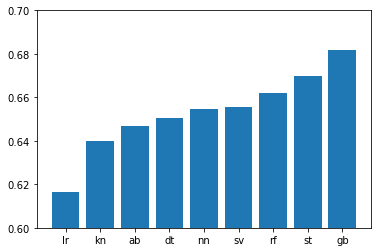

In [113]:
accuracies = [f1_score(y_val, lr.predict(X_val)),  
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, sv.predict(X_val)), 
              f1_score(y_val, st.predict(X_val))]
models = ['lr','kn','dt','nn','ab','rf','gb', 'sv', 'st']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.60,0.7)
plt.show()

In [118]:
estimators2 = [('gb', GradientBoostingClassifier(n_estimators =80, subsample = 0.8,
                                                        max_features = 0.5, min_samples_split=1000,
                                                         min_samples_leaf= 70, random_state = 15)),
              ('rf', RandomForestClassifier(n_estimators = 670, criterion = 'entropy', min_samples_split= 5, min_samples_leaf= 4, 
                          max_features= 'sqrt', max_depth= 80, bootstrap= True, random_state = 42)),
              ('sv', svm.SVC(kernel='rbf', C=10, gamma=0.01, probability=True))]
st1 = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression()).fit(X_train, y_train)

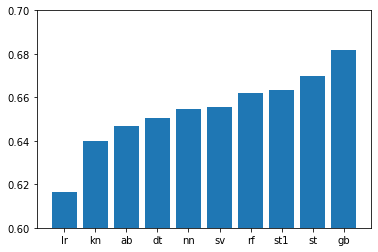

In [120]:
accuracies = [f1_score(y_val, lr.predict(X_val)),  
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, sv.predict(X_val)), 
              f1_score(y_val, st.predict(X_val)),
              f1_score(y_val, st1.predict(X_val))]
models = ['lr','kn','dt','nn','ab','rf','gb', 'sv', 'st', 'st1']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.60,0.7)
plt.show()

### Final Modeling: 

### Fitting the Model: 

In [141]:
rf=RandomForestClassifier(n_estimators = 670, criterion = 'entropy', min_samples_split= 5, min_samples_leaf= 4, 
                          max_features= 'sqrt', max_depth= 80, bootstrap= True, random_state = 42)
rf.fit(X = X_train, y = y_train)
labels_train = rf.predict(X_train)
labels_test = rf.predict(X_val)
print(f1_score(labels_train, y_train))
print(f1_score(labels_test, y_val))

0.95276023070585
0.9223076923076923


In [213]:
labels_test = rf.predict(test)

In [143]:
# kaggle submission: 
labels_test = pd.DataFrame(labels_test)
kaggle_sub=pd.DataFrame()
kaggle_sub = pd.concat([Access_ID, labels_test[0]],axis=1)
kaggle_sub = kaggle_sub.rename(columns={0: 'Buy'})

In [144]:
kaggle_sub

,Access_ID,Buy
0,798519314,0
1,798663101,0
2,798663221,0
3,798760918,0
4,798856982,1
...,...,...
2295,962042726,0
2296,962063064,0
2297,962147749,1
2298,962182167,0


In [145]:
#Exporting to csv file:
kaggle_sub.to_csv('sub37.csv', index = False)

# Final Results

## KNN
- train f1_score: 1 
- test f1_score: 0.67441

## LG
- train f1_score: 0.5793103448275863
- test f1_score: 0.64242

## SVM
- train f1_score: 0.6345381526104417
- test f1_score: 0.65882

## Decision Tree Classifier: 
- train f1_score: 0.651985111662531
- test f1_score: 0.66995

## Neural Networks: 
- train f1_score: 0.6536827195467423
- test f1 score: 0.67058

## Random Forest: 
- train f1_score: 0.7129019759783028
- test f1 score: 0.65408

## Gradient Boost Classifier: 
- train f1_score: 0.6861111111111111
- test f1_score: 0.66666

## AdaBoost Classifier: 
- train f1_score: 0.6556179775280899
- test f1_score: 0.66666

## Stacking: 
- train f1_score: 0.7849150435142975
- test f1_score: 0.69662